## Experiment on Weather specific PEMs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyhhmm.gaussian import GaussianHMM
from pyhhmm.multinomial import MultinomialHMM
from pyhhmm.heterogeneous import HeterogeneousHMM
import seaborn as sns
from prettytable import PrettyTable
import pyhhmm.utils as hu
import datetime
import math
import train_utils
from scipy.spatial import distance
from scipy.stats import entropy
from numpy.linalg import norm
from sklearn.neighbors import KernelDensity
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
%load_ext autoreload
%autoreload 2

Load dataset and pre-processing, get observations

Reserve best

In [3]:
# # Sun 
# ## fusion
# df_sun_fusion_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_sun_train_fusion.csv')
# df_sun_fusion_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_sun_test_fusion.csv')
# sun_fusion_noise_obs,sun_fusion_seq_len, sun_fusion_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_sun_train_fusion.csv')
# ## Radar
# df_sun_radar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_sun_train_radar.csv')
# df_sun_radar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_sun_test_radar.csv')
# sun_radar_noise_obs,sun_radar_seq_len, sun_radar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_sun_train_radar.csv')
# ## lidar
# df_sun_lidar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_sun_train_lidar.csv')
# df_sun_lidar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_sun_test_lidar.csv')
# sun_lidar_noise_obs,sun_lidar_seq_len, sun_lidar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_sun_train_lidar.csv')
# ############################################################
# # Night
# # df_night_train,df_night_test = traisun n_test_split(df_night,test_size=0.2,random_state=42)
# ## fusion
# df_night_fusion_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_night_train_fusion.csv')
# df_night_fusion_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_night_train_fusion.csv')
# night_fusion_noise_obs, night_fusion_seq_len, night_fusion_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_sun_train_fusion.csv')
# ## Radar
# df_night_radar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_night_train_radar.csv')
# df_night_radar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_night_test_radar.csv')
# night_radar_noise_obs,night_radar_seq_len, night_radar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_night_train_radar.csv')
# ## lidar
# df_night_lidar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_night_train_lidar.csv')
# df_night_lidar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_night_test_lidar.csv')
# night_lidar_noise_obs,night_lidar_seq_len, night_lidar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_night_train_lidar.csv')

# #############################################################
# # Rain
# # df_rain_train,df_rain_test = train_test_split(df_rain,test_size=0.2,random_state=42)
# ## fusion
# df_rain_fusion_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_rain_train_fusion.csv')
# df_rain_fusion_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_rain_train_fusion.csv')
# rain_fusion_noise_obs,rain_fusion_seq_len, rain_fusion_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_rain_train_fusion.csv')
# ## Radar
# df_rain_radar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_rain_train_radar.csv')
# df_rain_radar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_rain_test_radar.csv')
# rain_radar_noise_obs,rain_radar_seq_len, rain_radar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_rain_train_radar.csv')
# ## lidar
# df_rain_lidar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_rain_train_lidar.csv')
# df_rain_lidar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_rain_test_lidar.csv')
# rain_lidar_noise_obs,rain_lidar_seq_len, rain_lidar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_rain_train_lidar.csv')

# ###############################################################
# # Mixed
# ## fusion
# df_mix_fusion_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_mix_train_impute_fusion.csv')
# df_mix_fusion_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_mix_train_impute_fusion.csv')
# mix_fusion_noise_obs,mix_fusion_seq_len, mix_fusion_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_mix_train_impute_fusion.csv')
# ## Radar
# df_mix_radar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_mix_train_impute_radar.csv')
# df_mix_radar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_mix_test_impute_radar.csv')
# mix_radar_noise_obs,mix_radar_seq_len, mix_radar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/old/df_mix_train_impute_radar.csv')

# ## Lidar
# df_mix_lidar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_mix_train_impute_lidar.csv')
# df_mix_lidar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_mix_test_impute_lidar.csv')
# mix_lidar_noise_obs,mix_lidar_seq_len, mix_lidar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_mix_train_impute_lidar.csv')


Up to date data

In [2]:
# Sun 
## fusion
df_sun_fusion_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_sun_train_fusion.csv')
df_sun_fusion_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_sun_test_fusion.csv')
sun_fusion_noise_obs,sun_fusion_seq_len, sun_fusion_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_sun_train_fusion.csv')
## Radar
df_sun_radar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_sun_train_radar.csv')
df_sun_radar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_sun_test_radar.csv')
sun_radar_noise_obs,sun_radar_seq_len, sun_radar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_sun_train_radar.csv')
## lidar
df_sun_lidar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_sun_train_lidar.csv')
df_sun_lidar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_sun_test_lidar.csv')
sun_lidar_noise_obs,sun_lidar_seq_len, sun_lidar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_sun_train_lidar.csv')
############################################################
# Night
# df_night_train,df_night_test = traisun n_test_split(df_night,test_size=0.2,random_state=42)
## fusion
df_night_fusion_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_night_train_fusion.csv')
df_night_fusion_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_night_train_fusion.csv')
night_fusion_noise_obs, night_fusion_seq_len, night_fusion_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_sun_train_fusion.csv')
## Radar
df_night_radar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_night_train_radar.csv')
df_night_radar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_night_test_radar.csv')
night_radar_noise_obs,night_radar_seq_len, night_radar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_night_train_radar.csv')
## lidar
df_night_lidar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_night_train_lidar.csv')
df_night_lidar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_night_test_lidar.csv')
night_lidar_noise_obs,night_lidar_seq_len, night_lidar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_night_train_lidar.csv')

#############################################################
# Rain
# df_rain_train,df_rain_test = train_test_split(df_rain,test_size=0.2,random_state=42)
## fusion
df_rain_fusion_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_rain_train_fusion.csv')
df_rain_fusion_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_rain_train_fusion.csv')
rain_fusion_noise_obs,rain_fusion_seq_len, rain_fusion_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_rain_train_fusion.csv')
## Radar
df_rain_radar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_rain_train_radar.csv')
df_rain_radar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_rain_test_radar.csv')
rain_radar_noise_obs,rain_radar_seq_len, rain_radar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_rain_train_radar.csv')
## lidar
df_rain_lidar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_rain_train_lidar.csv')
df_rain_lidar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_rain_test_lidar.csv')
rain_lidar_noise_obs,rain_lidar_seq_len, rain_lidar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_rain_train_lidar.csv')

###############################################################
# Mixed
## fusion
df_mix_fusion_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_mix_train_impute_fusion.csv')
df_mix_fusion_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_mix_train_impute_fusion.csv')
mix_fusion_noise_obs,mix_fusion_seq_len, mix_fusion_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/df_mix_train_impute_fusion.csv')
## Radar
df_mix_radar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_mix_train_impute_radar.csv')
df_mix_radar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_mix_test_impute_radar.csv')
mix_radar_noise_obs,mix_radar_seq_len, mix_radar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_mix_train_impute_radar.csv')

## Lidar
df_mix_lidar_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_mix_train_impute_lidar.csv')
df_mix_lidar_test = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_mix_test_impute_lidar.csv')
mix_lidar_noise_obs,mix_lidar_seq_len, mix_lidar_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_mix_train_impute_lidar.csv')


In [ ]:
night_radar_noise_obs_test,_, _ = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/radar/df_sun_train_radar.csv')
plt.figure(figsize=(10,5))
error_theta = list()
for traj in night_radar_noise_obs_test:
    for ele in traj:
        error_theta.append(ele[1])
plt.hist(error_theta,bins=256)
plt.xlim(-45*np.pi/180,45*np.pi/180)

### Training

Mix

1 states: logL = -11053.463, AIC = 22120.927
Initial best model
2 states: logL = -8363.992, AIC = 16759.985
Best model updated. Selecting model with 2 states
3 states: logL = -7334.648, AIC = 14723.296
Best model updated. Selecting model with 3 states
4 states: logL = -5667.201, AIC = 11414.403
Best model updated. Selecting model with 4 states
5 states: logL = -3995.067, AIC = 8100.134
Best model updated. Selecting model with 5 states
6 states: logL = -4333.743, AIC = 8811.485
7 states: logL = -830.719, AIC = 1843.438
Best model updated. Selecting model with 7 states
8 states: logL = -326.058, AIC = 876.116
Best model updated. Selecting model with 8 states
9 states: logL = 857.457, AIC = -1444.914
Best model updated. Selecting model with 9 states
10 states: logL = 350.927, AIC = -381.854
11 states: logL = 50.219, AIC = 273.562


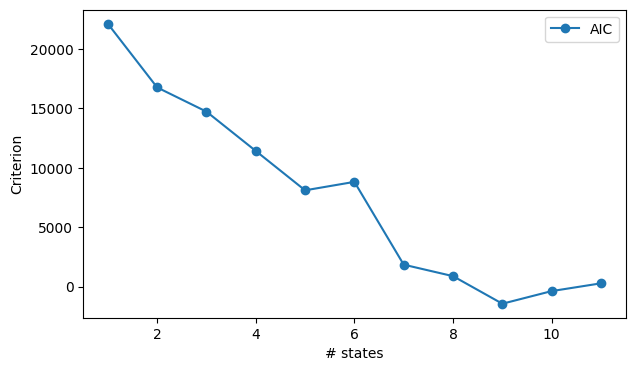

Initialisation 1
iter: 0, log_likelihood = -4204.253356005063, delta = nan
iter: 1, log_likelihood = -2471.628805333038, delta = 1732.6245506720252
iter: 2, log_likelihood = -2444.6486919593694, delta = 26.9801133736687
iter: 3, log_likelihood = -2444.3491279618443, delta = 0.29956399752518337
iter: 4, log_likelihood = -2444.346097001186, delta = 0.003030960658179538
iter: 5, log_likelihood = -2444.346066655599, delta = 3.034558721992653e-05
iter: 6, log_likelihood = -2444.346066352105, delta = 3.034938345081173e-07
iter: 7, log_likelihood = -2444.3460663490705, delta = 3.034529072465375e-09
Converged -> iter: 7, log_likelihood = -2444.3460663490705
1 states: logL = -2444.346, AIC = 4894.692
Initialisation 1
iter: 0, log_likelihood = -3488.4851325674385, delta = nan
iter: 1, log_likelihood = -2463.339332769001, delta = 1025.1457997984376
iter: 2, log_likelihood = -2433.011425670856, delta = 30.327907098144806
iter: 3, log_likelihood = -2417.0225367921444, delta = 15.988888878711805
ite

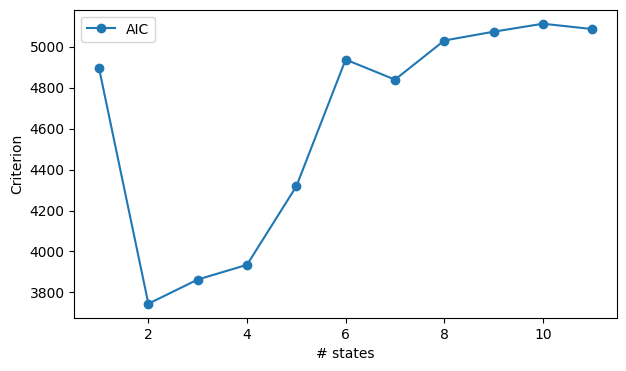

1 states: logL = -26549.890, AIC = 53113.779
Initial best model
2 states: logL = -17718.068, AIC = 35468.136
Best model updated. Selecting model with 2 states
3 states: logL = -14659.035, AIC = 29372.069
Best model updated. Selecting model with 3 states
4 states: logL = -11783.404, AIC = 23646.807
Best model updated. Selecting model with 4 states
5 states: logL = -12253.771, AIC = 24617.542
6 states: logL = -7859.533, AIC = 15863.066
Best model updated. Selecting model with 6 states
7 states: logL = -6726.339, AIC = 13634.678
Best model updated. Selecting model with 7 states
8 states: logL = -6444.703, AIC = 13113.406
Best model updated. Selecting model with 8 states
9 states: logL = -5568.810, AIC = 11407.619
Best model updated. Selecting model with 9 states
10 states: logL = -5130.055, AIC = 10580.110
Best model updated. Selecting model with 10 states
11 states: logL = -5473.082, AIC = 11320.163


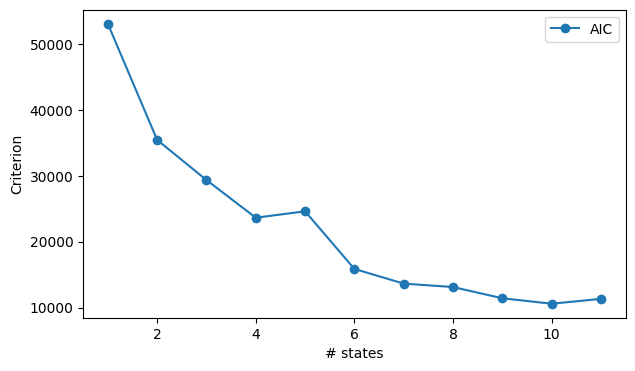

Initialisation 1
iter: 0, log_likelihood = -9475.837575759831, delta = nan
iter: 1, log_likelihood = -9468.992011960603, delta = 6.84556379922833
iter: 2, log_likelihood = -9468.924066147027, delta = 0.06794581357644347
iter: 3, log_likelihood = -9468.92338716406, delta = 0.0006789829658373492
iter: 4, log_likelihood = -9468.923380374685, delta = 6.789376129745506e-06
iter: 5, log_likelihood = -9468.923380306793, delta = 6.789196049794555e-08
Converged -> iter: 5, log_likelihood = -9468.923380306793
1 states: logL = -9468.923, AIC = 18943.847
Initialisation 1
iter: 0, log_likelihood = -11902.478218235246, delta = nan
iter: 1, log_likelihood = -9517.586771579614, delta = 2384.8914466556325
iter: 2, log_likelihood = -9485.913648483005, delta = 31.673123096608833
iter: 3, log_likelihood = -9476.867419823362, delta = 9.04622865964302
iter: 4, log_likelihood = -9471.005225329105, delta = 5.862194494256983
iter: 5, log_likelihood = -9466.46776653374, delta = 4.537458795364728
iter: 6, log_li

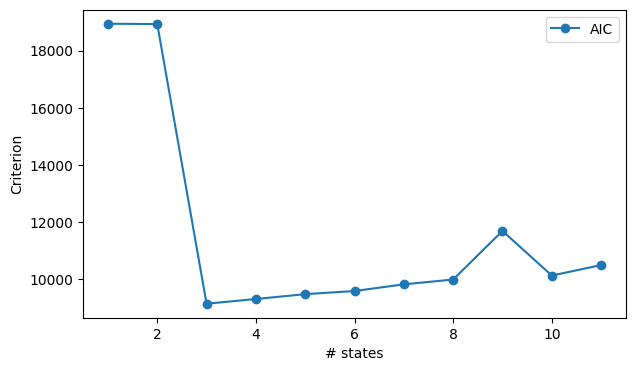

1 states: logL = -28485.549, AIC = 56985.098
Initial best model
2 states: logL = -20321.846, AIC = 40675.691
Best model updated. Selecting model with 2 states
3 states: logL = -20418.050, AIC = 40890.099
4 states: logL = -14911.328, AIC = 29902.655
Best model updated. Selecting model with 4 states
5 states: logL = -11977.959, AIC = 24065.919
Best model updated. Selecting model with 5 states
6 states: logL = -10567.387, AIC = 21278.774
Best model updated. Selecting model with 6 states
7 states: logL = -8917.226, AIC = 18016.452
Best model updated. Selecting model with 7 states
8 states: logL = -7540.799, AIC = 15305.599
Best model updated. Selecting model with 8 states
9 states: logL = -8065.291, AIC = 16400.583
10 states: logL = -9373.199, AIC = 19066.398
11 states: logL = -8471.051, AIC = 17316.102


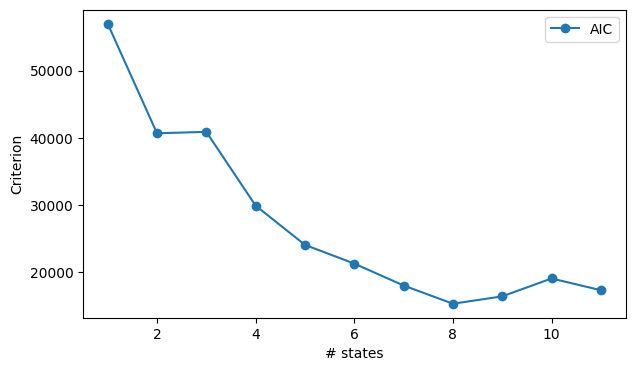

Initialisation 1
iter: 0, log_likelihood = -10069.718137756052, delta = nan
iter: 1, log_likelihood = -9807.506998633526, delta = 262.2111391225262
iter: 2, log_likelihood = -9804.833273684075, delta = 2.6737249494508433
iter: 3, log_likelihood = -9804.806438382475, delta = 0.026835301599930972
iter: 4, log_likelihood = -9804.80616992644, delta = 0.00026845603497349657
iter: 5, log_likelihood = -9804.806167241764, delta = 2.6846755645237863e-06
iter: 6, log_likelihood = -9804.80616721492, delta = 2.684464561752975e-08
Converged -> iter: 6, log_likelihood = -9804.80616721492
1 states: logL = -9804.806, AIC = 19615.612
Initialisation 1
iter: 0, log_likelihood = -9907.788145725655, delta = nan
iter: 1, log_likelihood = -9853.873606978297, delta = 53.914538747358165
iter: 2, log_likelihood = -9832.320703607653, delta = 21.552903370644344
iter: 3, log_likelihood = -9820.953325302307, delta = 11.367378305345483
iter: 4, log_likelihood = -9814.519363297006, delta = 6.43396200530151
iter: 5, l

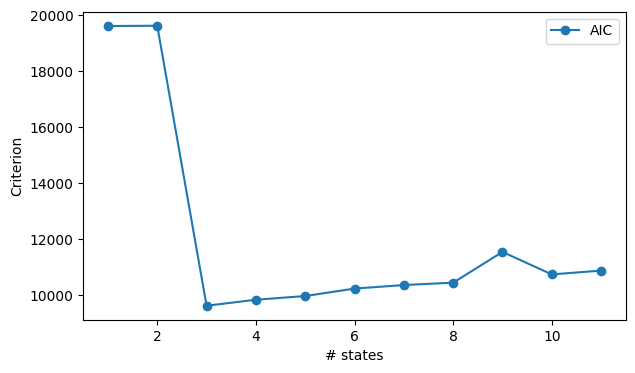

In [3]:
# mix_supervised_HMM1 = train_utils.train_supervised_HMM1(df_mix_train,visualize=False)
# Radar
mix_radar_unsupervised_HMM1,UHMM1_ll,HMM1_criteria = train_utils.train_unsupervised_HMM1(mix_radar_noise_obs,model_selection=True)
mix_radar_unsupervised_HMM2,HMM2_ll,HMM2_criteria = train_utils.train_unsupervised_HMM2(mix_radar_MD_obs,model_selection=True)

# Lidar
mix_lidar_unsupervised_HMM1,UHMM1_ll,HMM1_criteria = train_utils.train_unsupervised_HMM1(mix_lidar_noise_obs,model_selection=True)
mix_lidar_unsupervised_HMM2,HMM2_ll,HMM2_criteria = train_utils.train_unsupervised_HMM2(mix_lidar_MD_obs,model_selection=True)

# Fusion
mix_uHMM1, _,_ = train_utils.train_unsupervised_HMM1(mix_fusion_noise_obs,model_selection=True)
mix_uHMM2, _,_ = train_utils.train_unsupervised_HMM2(mix_fusion_MD_obs,model_selection=True)

In [5]:
## Save model if need 
timestamp = datetime.datetime.now().strftime("%m%d%H%M")
hu.save_model(mix_radar_unsupervised_HMM2,f'./models/model_select/mix_HMM2_{timestamp}_radar.pkl')
hu.save_model(mix_radar_unsupervised_HMM1,f'./models/model_select/mix_Unsupervised_HMM1_{timestamp}_radar.pkl')
# hu.save_model(mix_supervised_HMM1,f'./models/1115/mix_Supervised_HMM1_{timestamp}_minus.pkl')
hu.save_model(mix_lidar_unsupervised_HMM2,f'./models/model_select/mix_HMM2_{timestamp}_lidar.pkl')
hu.save_model(mix_lidar_unsupervised_HMM1,f'./models/model_select/mix_Unsupervised_HMM1_{timestamp}_lidar.pkl')
#
hu.save_model(mix_uHMM2,f'./models/model_select/mix_HMM2_{timestamp}_fusion.pkl')
hu.save_model(mix_uHMM1,f'./models/model_select/mix_Unsupervised_HMM1_{timestamp}_fusion.pkl')

Sun

1 states: logL = -14613.030, AIC = 29240.061
Initial best model
2 states: logL = -9078.919, AIC = 18189.838
Best model updated. Selecting model with 2 states
3 states: logL = -7202.444, AIC = 14458.888
Best model updated. Selecting model with 3 states
4 states: logL = -5985.533, AIC = 12051.065
Best model updated. Selecting model with 4 states
5 states: logL = -3790.904, AIC = 7691.809
Best model updated. Selecting model with 5 states
6 states: logL = -3142.049, AIC = 6428.098
Best model updated. Selecting model with 6 states
7 states: logL = -2881.441, AIC = 5944.883
Best model updated. Selecting model with 7 states
8 states: logL = -2807.751, AIC = 5839.503
Best model updated. Selecting model with 8 states
9 states: logL = 2903.359, AIC = -5536.719
Best model updated. Selecting model with 9 states
10 states: logL = 3523.245, AIC = -6726.490
Best model updated. Selecting model with 10 states
11 states: logL = 3377.773, AIC = -6381.545


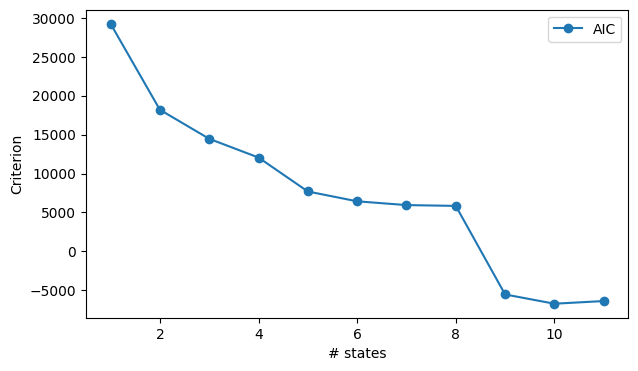

Initialisation 1
iter: 0, log_likelihood = -4359.322815050603, delta = nan
iter: 1, log_likelihood = -3764.2893010345124, delta = 595.0335140160905
iter: 2, log_likelihood = -3756.2493954300853, delta = 8.039905604427076
iter: 3, log_likelihood = -3756.1652252841673, delta = 0.08417014591805128
iter: 4, log_likelihood = -3756.16437951478, delta = 0.0008457693870695948
iter: 5, log_likelihood = -3756.164371052994, delta = 8.461786364932777e-06
iter: 6, log_likelihood = -3756.1643709683553, delta = 8.463848644169047e-08
iter: 7, log_likelihood = -3756.1643709675254, delta = 8.29913915367797e-10
Converged -> iter: 7, log_likelihood = -3756.1643709675254
1 states: logL = -3756.164, AIC = 7518.329
Initialisation 1
iter: 0, log_likelihood = -4287.253198369116, delta = nan
iter: 1, log_likelihood = -3747.98510348664, delta = 539.2680948824759
iter: 2, log_likelihood = -3738.153959878567, delta = 9.831143608073035
iter: 3, log_likelihood = -3733.7783021582427, delta = 4.375657720324398
iter: 4

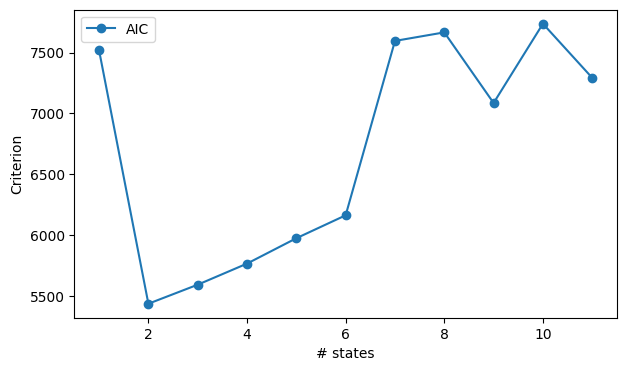

1 states: logL = -13272.452, AIC = 26558.903
Initial best model
2 states: logL = -9060.204, AIC = 18152.409
Best model updated. Selecting model with 2 states
3 states: logL = -7216.214, AIC = 14486.428
Best model updated. Selecting model with 3 states
4 states: logL = -6108.999, AIC = 12297.998
Best model updated. Selecting model with 4 states
5 states: logL = -5176.518, AIC = 10463.036
Best model updated. Selecting model with 5 states
6 states: logL = -4743.350, AIC = 9630.699
Best model updated. Selecting model with 6 states
7 states: logL = -4161.862, AIC = 8505.724
Best model updated. Selecting model with 7 states
8 states: logL = -4196.486, AIC = 8616.972
9 states: logL = -2390.674, AIC = 5051.348
Best model updated. Selecting model with 9 states
10 states: logL = -3260.558, AIC = 6841.115
11 states: logL = -2881.185, AIC = 6136.369


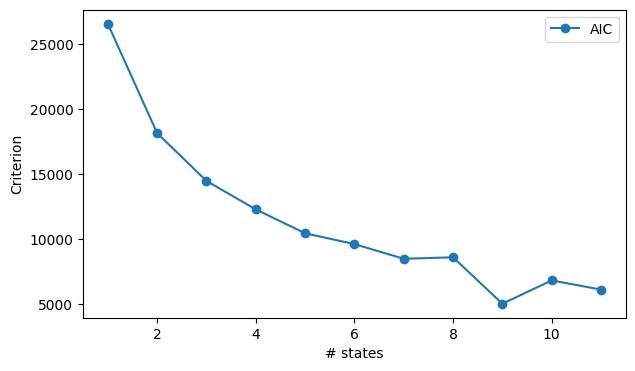

Initialisation 1
iter: 0, log_likelihood = -40013.74443665719, delta = nan
iter: 1, log_likelihood = -2925.062297284935, delta = 37088.68213937225
iter: 2, log_likelihood = -2731.3024310070596, delta = 193.75986627787552
iter: 3, log_likelihood = -2728.74702879688, delta = 2.5554022101796363
iter: 4, log_likelihood = -2728.7205220509163, delta = 0.026506745963615685
iter: 5, log_likelihood = -2728.720255978269, delta = 0.00026607264726408175
iter: 6, log_likelihood = -2728.7202533165337, delta = 2.6617353796609677e-06
iter: 7, log_likelihood = -2728.720253289908, delta = 2.6625457394402474e-08
Converged -> iter: 7, log_likelihood = -2728.720253289908
1 states: logL = -2728.720, AIC = 5463.441
Initialisation 1
iter: 0, log_likelihood = -3786.927805644449, delta = nan
iter: 1, log_likelihood = -2790.170793618218, delta = 996.7570120262312
iter: 2, log_likelihood = -2746.390225684492, delta = 43.780567933725706
iter: 3, log_likelihood = -2733.162787882475, delta = 13.227437802016993
iter:

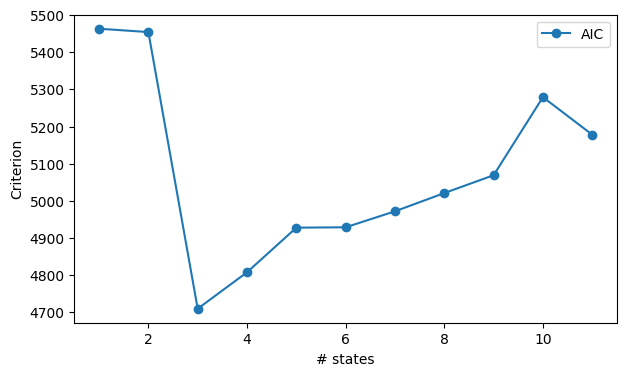

1 states: logL = -22807.946, AIC = 45629.892
Initial best model
2 states: logL = -18656.523, AIC = 37345.045
Best model updated. Selecting model with 2 states
3 states: logL = -12736.488, AIC = 25526.975
Best model updated. Selecting model with 3 states
4 states: logL = -10114.312, AIC = 20308.624
Best model updated. Selecting model with 4 states
5 states: logL = -11806.631, AIC = 23723.261
6 states: logL = -8493.622, AIC = 17131.244
Best model updated. Selecting model with 6 states
7 states: logL = -6457.620, AIC = 13097.239
Best model updated. Selecting model with 7 states
8 states: logL = -7048.788, AIC = 14321.575
9 states: logL = -5443.473, AIC = 11156.945
Best model updated. Selecting model with 9 states
10 states: logL = -5344.410, AIC = 11008.819
Best model updated. Selecting model with 10 states
11 states: logL = -5490.773, AIC = 11355.546


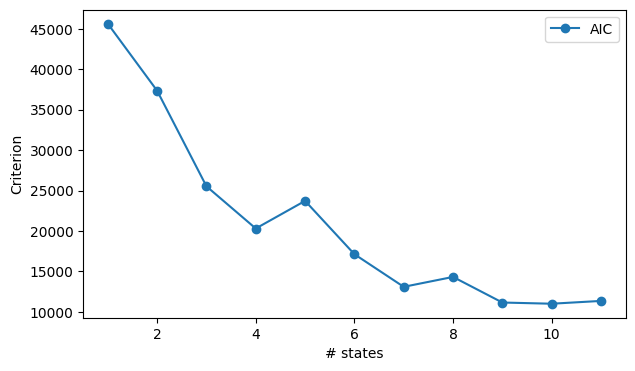

Initialisation 1
iter: 0, log_likelihood = -11223.33493312619, delta = nan
iter: 1, log_likelihood = -8407.427620350578, delta = 2815.907312775613
iter: 2, log_likelihood = -8383.334823939918, delta = 24.092796410659503
iter: 3, log_likelihood = -8383.09279912679, delta = 0.24202481312750024
iter: 4, log_likelihood = -8383.090377337565, delta = 0.0024217892259912333
iter: 5, log_likelihood = -8383.090353118092, delta = 2.4219472834374756e-05
iter: 6, log_likelihood = -8383.090352875923, delta = 2.4216933525167406e-07
iter: 7, log_likelihood = -8383.090352873473, delta = 2.4501787265762687e-09
Converged -> iter: 7, log_likelihood = -8383.090352873473
1 states: logL = -8383.090, AIC = 16772.181
Initialisation 1
iter: 0, log_likelihood = -8778.664581371535, delta = nan
iter: 1, log_likelihood = -8176.84968597055, delta = 601.8148954009848
iter: 2, log_likelihood = -7570.875503882291, delta = 605.9741820882591
iter: 3, log_likelihood = -5875.512155263976, delta = 1695.3633486183153
iter: 4

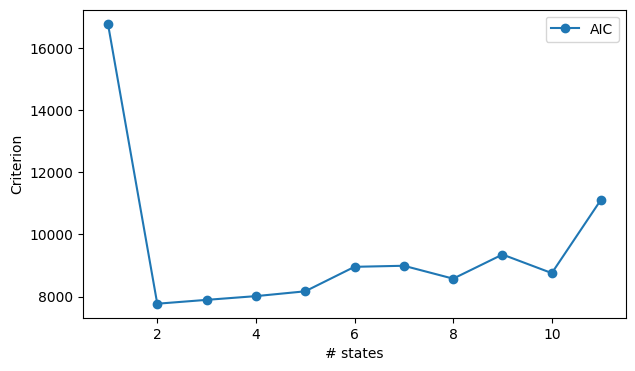

In [7]:
# sun_supervised_HMM1 = train_utils.train_supervised_HMM1(df_sun_radar_train,visualize=False)
sun_radar_unsupervised_HMM1,UHMM1_ll,HMM1_criteria = train_utils.train_unsupervised_HMM1(sun_radar_noise_obs,model_selection=True)
sun_radar_unsupervised_HMM2,HMM2_ll,HMM2_criteria = train_utils.train_unsupervised_HMM2(sun_radar_MD_obs,model_selection=True)

sun_lidar_unsupervised_HMM1,UHMM1_ll,HMM1_criteria = train_utils.train_unsupervised_HMM1(sun_lidar_noise_obs,model_selection=True)
sun_lidar_unsupervised_HMM2,HMM2_ll,HMM2_criteria = train_utils.train_unsupervised_HMM2(sun_lidar_MD_obs,model_selection=True)
sun_uHMM1, _,_ = train_utils.train_unsupervised_HMM1(sun_fusion_noise_obs,model_selection=True)
sun_uHMM2, _,_ = train_utils.train_unsupervised_HMM2(sun_fusion_MD_obs,model_selection=True)

In [8]:
## Save model if need 
# timestamp = datetime.datetime.now().strftime("%m%d%H%M")
hu.save_model(sun_radar_unsupervised_HMM2,f'./models/model_select/sun_HMM2_{timestamp}_radar.pkl')
hu.save_model(sun_radar_unsupervised_HMM1,f'./models/model_select/sun_Unsupervised_HMM1_{timestamp}_radar.pkl')
# hu.save_model(sun_radar_supervised_HMM1,f'./models/1118/sun_Supervised_HMM1_{timestamp}_radar.pkl')
hu.save_model(sun_lidar_unsupervised_HMM2,f'./models/model_select/sun_HMM2_{timestamp}_lidar.pkl')
hu.save_model(sun_lidar_unsupervised_HMM1,f'./models/model_select/sun_Unsupervised_HMM1_{timestamp}_lidar.pkl')

hu.save_model(sun_uHMM2,f'./models/model_select/sun_HMM2_{timestamp}_fusion.pkl')
hu.save_model(sun_uHMM1,f'./models/model_select/sun_Unsupervised_HMM1_{timestamp}_fusion.pkl')


Night

1 states: logL = -2072.320, AIC = 4158.639
Initial best model
2 states: logL = -1377.504, AIC = 2787.007
Best model updated. Selecting model with 2 states
3 states: logL = -849.030, AIC = 1752.061
Best model updated. Selecting model with 3 states
4 states: logL = 667.479, AIC = -1254.958
Best model updated. Selecting model with 4 states
5 states: logL = 1388.814, AIC = -2667.628
Best model updated. Selecting model with 5 states
6 states: logL = 980.719, AIC = -1817.438
7 states: logL = 1021.153, AIC = -1860.307
8 states: logL = 1922.348, AIC = -3620.696
Best model updated. Selecting model with 8 states
9 states: logL = 2496.633, AIC = -4723.265
Best model updated. Selecting model with 9 states
10 states: logL = 2175.436, AIC = -4030.871
11 states: logL = 2697.919, AIC = -5021.839
Best model updated. Selecting model with 11 states


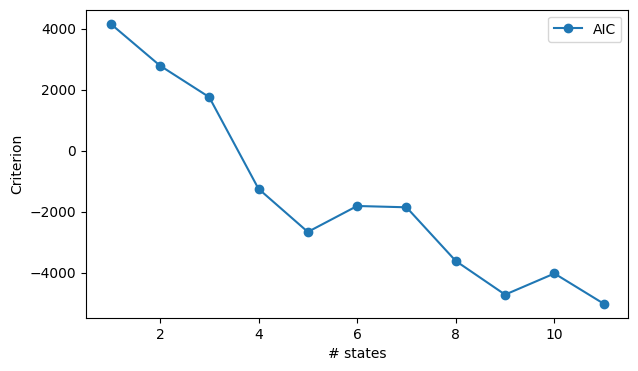

Initialisation 1
iter: 0, log_likelihood = -755.8969505468683, delta = nan
iter: 1, log_likelihood = -393.96862376132935, delta = 361.92832678553896
iter: 2, log_likelihood = -389.59385737672744, delta = 4.374766384601912
iter: 3, log_likelihood = -389.54653834694386, delta = 0.047319029783579936
iter: 4, log_likelihood = -389.5460609407267, delta = 0.0004774062171577498
iter: 5, log_likelihood = -389.5460561623741, delta = 4.7783526042621816e-06
iter: 6, log_likelihood = -389.5460561145861, delta = 4.7787978019186994e-08
iter: 7, log_likelihood = -389.5460561141075, delta = 4.786215868080035e-10
Converged -> iter: 7, log_likelihood = -389.5460561141075
1 states: logL = -389.546, AIC = 785.092
Initialisation 1
iter: 0, log_likelihood = -371.2617253574782, delta = nan
iter: 1, log_likelihood = -342.6115959897111, delta = 28.650129367767136
iter: 2, log_likelihood = -318.3474191149816, delta = 24.264176874729458
iter: 3, log_likelihood = -307.3381593440561, delta = 11.009259770925496
ite

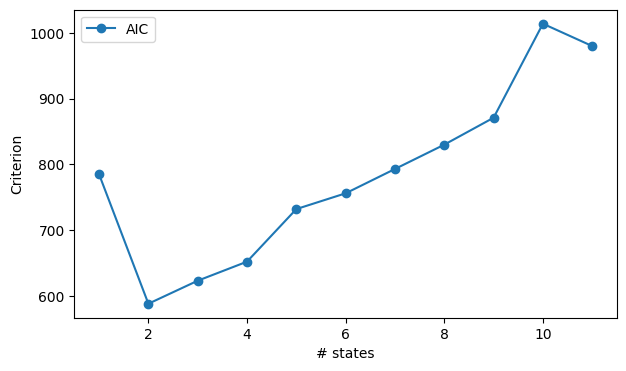

1 states: logL = -24527.925, AIC = 49069.850
Initial best model
2 states: logL = -14084.727, AIC = 28201.453
Best model updated. Selecting model with 2 states
3 states: logL = -11687.124, AIC = 23428.248
Best model updated. Selecting model with 3 states
4 states: logL = -7753.443, AIC = 15586.886
Best model updated. Selecting model with 4 states
5 states: logL = -6410.953, AIC = 12931.905
Best model updated. Selecting model with 5 states
6 states: logL = -4016.296, AIC = 8176.592
Best model updated. Selecting model with 6 states
7 states: logL = -2872.919, AIC = 5927.838
Best model updated. Selecting model with 7 states
8 states: logL = -2123.441, AIC = 4470.882
Best model updated. Selecting model with 8 states
9 states: logL = -976.781, AIC = 2223.562
Best model updated. Selecting model with 9 states
10 states: logL = -3081.855, AIC = 6483.711
11 states: logL = -1225.360, AIC = 2824.721


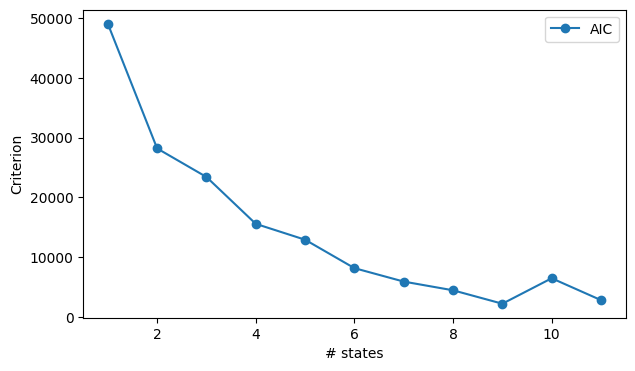

Initialisation 1
iter: 0, log_likelihood = -10200.65358957314, delta = nan
iter: 1, log_likelihood = -10148.322529750456, delta = 52.33105982268353
iter: 2, log_likelihood = -10147.805215595563, delta = 0.5173141548930289
iter: 3, log_likelihood = -10147.800046711309, delta = 0.0051688842540897895
iter: 4, log_likelihood = -10147.79999502655, delta = 5.1684759455383755e-05
iter: 5, log_likelihood = -10147.799994509704, delta = 5.168458301341161e-07
iter: 6, log_likelihood = -10147.799994504529, delta = 5.175024853087962e-09
Converged -> iter: 6, log_likelihood = -10147.799994504529
1 states: logL = -10147.800, AIC = 20301.600
Initialisation 1
iter: 0, log_likelihood = -10195.543075940666, delta = nan
iter: 1, log_likelihood = -10027.187140604703, delta = 168.3559353359633
iter: 2, log_likelihood = -9294.297282883497, delta = 732.8898577212058
iter: 3, log_likelihood = -6489.827203773991, delta = 2804.4700791095065
iter: 4, log_likelihood = -4637.587854380786, delta = 1852.239349393205


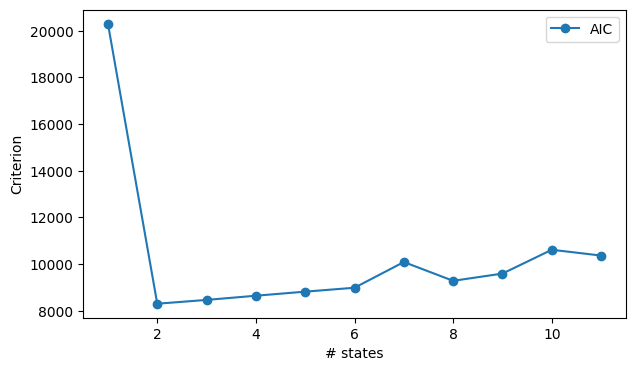

1 states: logL = -22807.946, AIC = 45629.892
Initial best model
2 states: logL = -15633.615, AIC = 31299.229
Best model updated. Selecting model with 2 states
3 states: logL = -12736.525, AIC = 25527.050
Best model updated. Selecting model with 3 states
4 states: logL = -12913.419, AIC = 25906.838
5 states: logL = -11796.747, AIC = 23703.494
Best model updated. Selecting model with 5 states
6 states: logL = -7531.991, AIC = 15207.982
Best model updated. Selecting model with 6 states
7 states: logL = -7148.718, AIC = 14479.436
Best model updated. Selecting model with 7 states
8 states: logL = -6454.455, AIC = 13132.911
Best model updated. Selecting model with 8 states
9 states: logL = -5845.822, AIC = 11961.644
Best model updated. Selecting model with 9 states
10 states: logL = -5157.328, AIC = 10634.656
Best model updated. Selecting model with 10 states
11 states: logL = -5504.701, AIC = 11383.403


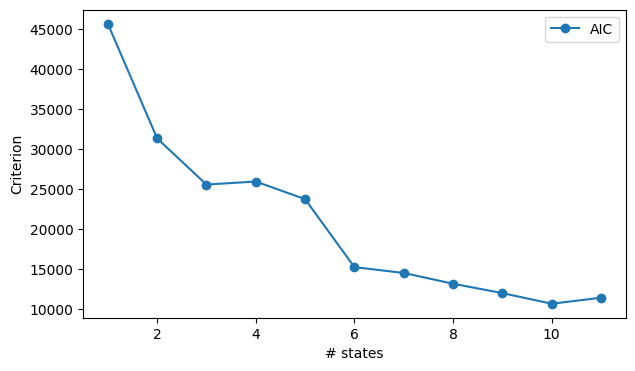

Initialisation 1
iter: 0, log_likelihood = -11215.511626375133, delta = nan
iter: 1, log_likelihood = -8404.243226034776, delta = 2811.2684003403574
iter: 2, log_likelihood = -8383.30024168295, delta = 20.942984351826453
iter: 3, log_likelihood = -8383.092450460204, delta = 0.20779122274507245
iter: 4, log_likelihood = -8383.090373848072, delta = 0.002076612132441369
iter: 5, log_likelihood = -8383.090353083218, delta = 2.0764853616128676e-05
iter: 6, log_likelihood = -8383.090352875548, delta = 2.0767038222402334e-07
iter: 7, log_likelihood = -8383.090352873469, delta = 2.079104888252914e-09
Converged -> iter: 7, log_likelihood = -8383.090352873469
1 states: logL = -8383.090, AIC = 16772.181
Initialisation 1
iter: 0, log_likelihood = -10322.224924147933, delta = nan
iter: 1, log_likelihood = -8476.68064106221, delta = 1845.5442830857228
iter: 2, log_likelihood = -8360.849671469432, delta = 115.83096959277827
iter: 3, log_likelihood = -8258.612621564973, delta = 102.23704990445913
iter

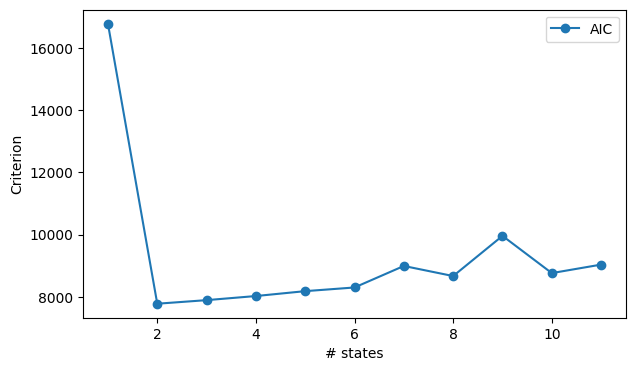

In [9]:
# night_supervised_HMM1 = train_utils.train_supervised_HMM1(df_night_train,visualize=True)
night_radar_unsupervised_HMM1, UHMM1_ll, HMM1_criteria = train_utils.train_unsupervised_HMM1(night_radar_noise_obs,model_selection=True)
night_radar_unsupervised_HMM2, UHMM2_ll, HMM2_criteria = train_utils.train_unsupervised_HMM2(night_radar_MD_obs,model_selection=True)

night_lidar_unsupervised_HMM1, UHMM1_ll, HMM1_criteria = train_utils.train_unsupervised_HMM1(night_lidar_noise_obs,model_selection=True)
night_lidar_unsupervised_HMM2, UHMM2_ll, HMM2_criteria = train_utils.train_unsupervised_HMM2(night_lidar_MD_obs,model_selection=True)
night_uHMM1, _,_ = train_utils.train_unsupervised_HMM1(night_fusion_noise_obs,model_selection=True)
night_uHMM2, _,_ = train_utils.train_unsupervised_HMM2(night_fusion_MD_obs,model_selection=True)

In [10]:
## Save model if need 
# timestamp = datetime.datetime.now().strftime("%m%d%H%M")
hu.save_model(night_radar_unsupervised_HMM2,f'./models/model_select/night_HMM2_{timestamp}_radar.pkl')
hu.save_model(night_radar_unsupervised_HMM1,f'./models/model_select/night_Unsupervised_HMM1_{timestamp}_radar.pkl')

hu.save_model(night_lidar_unsupervised_HMM2,f'./models/model_select/night_HMM2_{timestamp}_lidar.pkl')
hu.save_model(night_lidar_unsupervised_HMM1,f'./models/model_select/night_Unsupervised_HMM1_{timestamp}_lidar.pkl')

hu.save_model(night_uHMM2,f'./models/model_select/night_HMM2_{timestamp}_fusion.pkl')
hu.save_model(night_uHMM1,f'./models/model_select/night_Unsupervised_HMM1_{timestamp}_fusion.pkl')

Rain

1 states: logL = -16445.175, AIC = 32904.350
Initial best model
2 states: logL = -12178.779, AIC = 24389.557
Best model updated. Selecting model with 2 states
3 states: logL = -9827.075, AIC = 19708.150
Best model updated. Selecting model with 3 states
4 states: logL = -8505.531, AIC = 17091.062
Best model updated. Selecting model with 4 states
5 states: logL = -8735.877, AIC = 17581.753
6 states: logL = -6340.201, AIC = 12824.401
Best model updated. Selecting model with 6 states
7 states: logL = -3994.447, AIC = 8170.894
Best model updated. Selecting model with 7 states
8 states: logL = -4297.055, AIC = 8818.111
9 states: logL = -2693.955, AIC = 5657.911
Best model updated. Selecting model with 9 states
10 states: logL = -2261.809, AIC = 4843.619
Best model updated. Selecting model with 10 states
11 states: logL = -853.084, AIC = 2080.167
Best model updated. Selecting model with 11 states


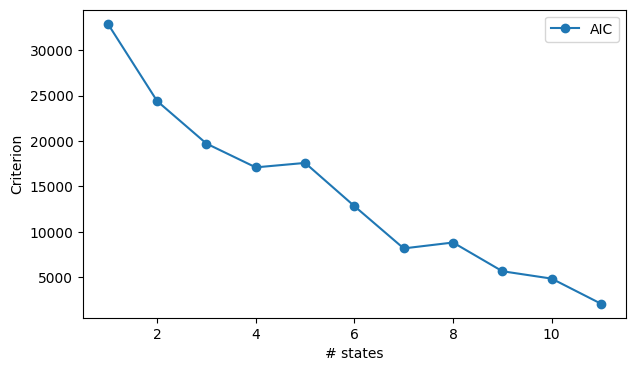

Initialisation 1
iter: 0, log_likelihood = -16644.200012195277, delta = nan
iter: 1, log_likelihood = -3369.360515951157, delta = 13274.83949624412
iter: 2, log_likelihood = -3221.0517691053856, delta = 148.30874684577157
iter: 3, log_likelihood = -3219.221212250835, delta = 1.8305568545506503
iter: 4, log_likelihood = -3219.202416479701, delta = 0.018795771134136885
iter: 5, log_likelihood = -3219.2022280115193, delta = 0.00018846818147721933
iter: 6, log_likelihood = -3219.202226126323, delta = 1.8851965251087677e-06
iter: 7, log_likelihood = -3219.202226107467, delta = 1.8855644157156348e-08
Converged -> iter: 7, log_likelihood = -3219.202226107467
1 states: logL = -3219.202, AIC = 6444.404
Initialisation 1
iter: 0, log_likelihood = -3928.433039406609, delta = nan
iter: 1, log_likelihood = -2969.516711352311, delta = 958.916328054298
iter: 2, log_likelihood = -2910.081849106724, delta = 59.43486224558728
iter: 3, log_likelihood = -2860.644275666835, delta = 49.43757343988909
iter: 4

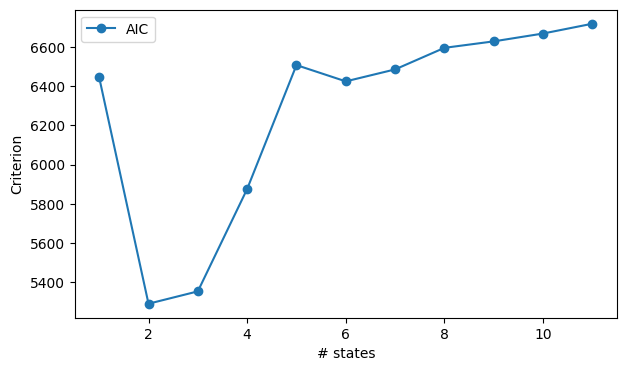

1 states: logL = -29900.953, AIC = 59815.906
Initial best model
2 states: logL = -20712.647, AIC = 41457.294
Best model updated. Selecting model with 2 states
3 states: logL = -15719.442, AIC = 31492.884
Best model updated. Selecting model with 3 states
4 states: logL = -12558.749, AIC = 25197.498
Best model updated. Selecting model with 4 states
5 states: logL = -10040.663, AIC = 20191.326
Best model updated. Selecting model with 5 states
6 states: logL = -8346.242, AIC = 16836.484
Best model updated. Selecting model with 6 states
7 states: logL = -7944.807, AIC = 16071.614
Best model updated. Selecting model with 7 states


In [11]:
# rain_supervised_HMM1 = train_utils.train_supervised_HMM1(df_rain_train,visualize=True)
rain_radar_unsupervised_HMM1,rain_HMM1_ll,HMM1_criteria = train_utils.train_unsupervised_HMM1(rain_radar_noise_obs,model_selection=True)
rain_radar_unsupervised_HMM2,rain_HMM2_ll,HMM2_criteria = train_utils.train_unsupervised_HMM2(rain_radar_MD_obs,model_selection=True)

rain_lidar_unsupervised_HMM1,rain_HMM1_ll,HMM1_criteria = train_utils.train_unsupervised_HMM1(rain_lidar_noise_obs,model_selection=True)
rain_lidar_unsupervised_HMM2,rain_HMM2_ll,HMM2_criteria = train_utils.train_unsupervised_HMM2(rain_lidar_MD_obs,model_selection=True)
rain_uHMM1, _,_ = train_utils.train_unsupervised_HMM1(rain_fusion_noise_obs,model_selection=True)
rain_uHMM2, _,_ = train_utils.train_unsupervised_HMM2(rain_fusion_MD_obs,model_selection=True)

In [ ]:
## Save model if need 
# timestamp = datetime.datetime.now().strftime("%m%d%H%M")
hu.save_model(rain_radar_unsupervised_HMM2,f'./models/model_select/rain_HMM2_{timestamp}_radar.pkl')
hu.save_model(rain_radar_unsupervised_HMM1,f'./models/model_select/rain_Unsupervised_HMM1_{timestamp}_radar.pkl')
#
hu.save_model(rain_lidar_unsupervised_HMM2,f'./models/model_select/rain_HMM2_{timestamp}_lidar.pkl')
hu.save_model(rain_lidar_unsupervised_HMM1,f'./models/model_select/rain_Unsupervised_HMM1_{timestamp}_lidar.pkl')
#
hu.save_model(rain_uHMM2,f'./models/model_select/rain_HMM2_{timestamp}_fusion.pkl')
hu.save_model(rain_uHMM1,f'./models/model_select/rain_Unsupervised_HMM1_{timestamp}_fusion.pkl')


In [ ]:
hu.pretty_print_hmm(rain_uHMM2)

### Inference

load model

1115: fusion
1116: radar, lidar  respectively

In [4]:
## Load and visualize model if need
##### Mix
## fusion
############### Best Result ##########
date = '1120'
datetime = '11190301'
######################################
# date = '1124'
# datetime = '11250013'
mix_uHMM2= hu.load_model('./models/{}/mix_HMM2_{}_fusion.pkl'.format(date,datetime))
mix_uHMM1 = hu.load_model('./models/{}/mix_Unsupervised_HMM1_{}_fusion.pkl'.format(date,datetime))

## Radar
mix_radar_uHMM2 = hu.load_model('./models/{}/mix_HMM2_{}_radar.pkl'.format(date,datetime))
mix_radar_uHMM1 = hu.load_model('./models/{}/mix_Unsupervised_HMM1_{}_radar.pkl'.format(date,datetime))
## Lidar
mix_lidar_uHMM2 = hu.load_model('./models/{}/mix_HMM2_{}_lidar.pkl'.format(date,datetime))
mix_lidar_uHMM1 = hu.load_model('./models/{}/mix_Unsupervised_HMM1_{}_lidar.pkl'.format(date,datetime))

###### Sun
## fusion
sun_uHMM2= hu.load_model('./models/{}/sun_HMM2_{}_fusion.pkl'.format(date,datetime))
sun_uHMM1 = hu.load_model('./models/{}/sun_Unsupervised_HMM1_{}_fusion.pkl'.format(date,datetime))

## Radar
sun_radar_uHMM2 = hu.load_model('./models/{}/sun_HMM2_{}_radar.pkl'.format(date,datetime))
sun_radar_uHMM1 = hu.load_model('./models/{}/sun_Unsupervised_HMM1_{}_radar.pkl'.format(date,datetime))
## Lidar
sun_lidar_uHMM2 = hu.load_model('./models/{}/sun_HMM2_{}_lidar.pkl'.format(date,datetime))
sun_lidar_uHMM1 = hu.load_model('./models/{}/sun_Unsupervised_HMM1_{}_lidar.pkl'.format(date,datetime))


###### Night
## fusion
night_uHMM2= hu.load_model('./models/{}/night_HMM2_{}_fusion.pkl'.format(date,datetime))
night_uHMM1 = hu.load_model('./models/{}/night_Unsupervised_HMM1_{}_fusion.pkl'.format(date,datetime))
## Radar
night_radar_uHMM2 = hu.load_model('./models/{}/night_HMM2_{}_radar.pkl'.format(date,datetime))
night_radar_uHMM1 = hu.load_model('./models/{}/night_Unsupervised_HMM1_{}_radar.pkl'.format(date,datetime))
## Lidar
night_lidar_uHMM2 = hu.load_model('./models/{}/night_HMM2_{}_lidar.pkl'.format(date,datetime))
night_lidar_uHMM1 = hu.load_model('./models/{}/night_Unsupervised_HMM1_{}_lidar.pkl'.format(date,datetime))


####### Rain
## fusion
rain_uHMM2= hu.load_model('./models/{}/rain_HMM2_{}_fusion.pkl'.format(date,datetime))
rain_uHMM1 = hu.load_model('./models/{}/rain_Unsupervised_HMM1_{}_fusion.pkl'.format(date,datetime))
## Radar
rain_radar_uHMM2 = hu.load_model('./models/{}/rain_HMM2_{}_radar.pkl'.format(date,datetime))
rain_radar_uHMM1 = hu.load_model('./models/{}/rain_Unsupervised_HMM1_{}_radar.pkl'.format(date,datetime))
## Lidar
rain_lidar_uHMM2 = hu.load_model('./models/{}/rain_HMM2_{}_lidar.pkl'.format(date,datetime))
rain_lidar_uHMM1 = hu.load_model('./models/{}/rain_Unsupervised_HMM1_{}_lidar.pkl'.format(date,datetime))


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
%matplotlib qt
def PEMs_Evaluation(df_test, noise_HMM, MD_HMM):
    '''Evaluate the unsupervised HMM for noise and prescene given the test set'''
    
    inference_MD_seq = list()
    inference_R_seq = list()
    inference_Theta_seq = list()
    gt_prescene_seq = list()
    gt_RNoise_seq = list()
    gt_ThetaNoise_seq = list()
    for idx in range(0,df_test.shape[0]):
        r_seq = list(df_test.iloc[idx,0].replace("[","").replace("]","").split(","))
        r_seq = [float(i) for i in r_seq]
        theta_seq = list(df_test.iloc[idx,1].replace("[","").replace("]","").split(","))
        theta_seq = [float(i) for i in theta_seq]
        nbr_sample = len(r_seq)
        # Sampling
        MDobs_seq = MD_HMM.sample(n_sequences=1,n_samples = nbr_sample,return_states=False)
        NoiseObs_seq = noise_HMM.sample(n_sequences=1,n_samples = nbr_sample,return_states=False)
        # print(NoiseObs_seq[0][:,0])
        for ele in NoiseObs_seq[0][:,0]:
            inference_R_seq.append(float(ele))
        for ele in NoiseObs_seq[0][:,1]:
            inference_Theta_seq.append(float(ele))

        # Get GT from test set
        gt_MD_traj = list(df_test.iloc[idx,2].replace("[","").replace("]","").split(","))
        gt_MD_traj = [int(i) for i in gt_MD_traj]
        gt_RNoiseObs_traj = list(df_test.iloc[idx,0].replace("[","").replace("]","").split(","))
        gt_RNoiseObs_traj = [float(i) for i in gt_RNoiseObs_traj]
        gt_ThetaNoiseObs_traj = list(df_test.iloc[idx,1].replace("[","").replace("]","").split(","))
        gt_ThetaNoiseObs_traj = [float(i) for i in gt_ThetaNoiseObs_traj]

        #  Clean up data to list sum(n_i) x 1
        inference_MD_seq.append(np.concatenate(MDobs_seq).ravel())
        gt_prescene_seq.append(gt_MD_traj)
        gt_RNoise_seq.append(gt_RNoiseObs_traj)
        gt_ThetaNoise_seq.append(gt_ThetaNoiseObs_traj)
    #
    inference_MD_seq = np.concatenate(inference_MD_seq).ravel()
    #
    gt_prescene_seq = np.concatenate(gt_prescene_seq).ravel()
    gt_RNoise_seq = np.concatenate(gt_RNoise_seq).ravel()
    gt_ThetaNoise_seq = np.concatenate(gt_ThetaNoise_seq).ravel()
    # MD
    print(classification_report(gt_prescene_seq,inference_MD_seq))
    print(confusion_matrix(gt_prescene_seq,inference_MD_seq))
    #-------------------------------- Visualize the result ---------------------------------------#
    fig,axs = plt.subplots(1,2,figsize=(16,12))
    plt.rcParams.update({'font.size': 45})
    # plt.rcParams['grid.linewidth'] = 3.5
    fig.set_size_inches((23, 23))
    plt.rc('ytick', labelsize = 45)
    plt.rc('xtick',labelsize = 45)
    plt.subplots_adjust( wspace=0.2)
    # Visualize the nosie R
    kde_inf = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(inference_R_seq).reshape(-1,1))
    kde_gt = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(gt_RNoise_seq).reshape(-1,1))    
    axs[0].hist(inference_R_seq,bins=100,alpha=0.5,density=True,color='darkblue',label='hist:Inference')
    axs[0].hist(gt_RNoise_seq,bins=100,alpha=0.5,density=True,color='darkorange',label='hist:Ground Truth')
    sns.kdeplot(inference_R_seq,kernel='gaussian',bw=0.1,color='darkblue',ax=axs[0],label='KDE:Inference',linewidth=3)
    sns.kdeplot(gt_RNoise_seq,kernel='gaussian',bw=0.1,color='darkorange',ax=axs[0],label='KDE:Ground Truth',linewidth=3)
    ll_inf = kde_gt.score_samples(np.array(inference_R_seq).reshape(-1,1))
    ll_gt = kde_gt.score_samples(np.array(gt_RNoise_seq).reshape(-1,1))
    axs[0].set_xlabel(r"$\varepsilon_{r}$ in polar coordinate system (m)")
    axs[0].set_title(r'$\varepsilon_{r}$'+'distribution, JS Div. = {:.3f}'.format((distance.jensenshannon(np.exp(ll_inf),np.exp(ll_gt)))**2))
    # axs[0].set_xlim(0,3.5)
    print('JS divergence of R parameter:{:.3f}'.format((distance.jensenshannon(np.exp(ll_gt),np.exp(ll_inf)))**2))
    
    # Visualize the nosie theta
    kde_inf_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(inference_Theta_seq).reshape(-1,1))
    kde_gt_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(gt_ThetaNoise_seq).reshape(-1,1))
    axs[1].hist(inference_Theta_seq,bins=100,alpha=0.5,density=True,color='darkblue',label='hist:Inference')
    axs[1].hist(gt_ThetaNoise_seq,bins=100,alpha=0.5,density=True,color='darkorange',label='hist:Ground Truth')
    sns.kdeplot(inference_Theta_seq,kernel='gaussian',bw=0.1,color='darkblue',ax=axs[1],label='KDE:Inference',linewidth=3)
    sns.kdeplot(gt_ThetaNoise_seq,kernel='gaussian',bw=0.1,color='darkorange',ax=axs[1],label='KDE:Ground Truth',linewidth=3)
    ll_inf = kde_inf_t.score_samples(np.array(inference_Theta_seq).reshape(-1,1))
    ll_gt = kde_gt_t.score_samples(np.array(gt_ThetaNoise_seq).reshape(-1,1))
    axs[1].set_xlabel(r'$\varepsilon_{\theta}$ in polar coordinate system (rad)')
    axs[1].set_title(r'$\varepsilon_{\theta}$'+'distribution, JS Div. = {:.3f}'.format((distance.jensenshannon(np.exp(ll_inf),np.exp(ll_gt)))**2))
    
    print('JS divergence of theta parameter:{:.3f}'.format((distance.jensenshannon(np.exp(ll_inf),np.exp(ll_gt)))**2))
    axs[1].set_xlim(-45*math.pi/180,45*math.pi/180)
    axs[0].legend(loc='upper right')
    axs[1].legend() 
    # return the return the inference and ground truth {MD,noise} sequence
    return inference_MD_seq,inference_R_seq,inference_Theta_seq,gt_prescene_seq,gt_RNoise_seq,gt_ThetaNoise_seq


In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
%matplotlib qt
def PEMs_CoEvaluation(df_test, noise_HMM, MD_HMM):
    '''Evaluate the unsupervised HMM for noise and prescene given the test set'''
    
    inference_MD_seq = list()
    inference_R_seq = list()
    inference_Theta_seq = list()
    gt_prescene_seq = list()
    gt_RNoise_seq = list()
    gt_ThetaNoise_seq = list()
    for idx in range(0,df_test.shape[0]):
        r_seq = list(df_test.iloc[idx,0].replace("[","").replace("]","").split(","))
        r_seq = [float(i) for i in r_seq]
        theta_seq = list(df_test.iloc[idx,1].replace("[","").replace("]","").split(","))
        theta_seq = [float(i) for i in theta_seq]
        nbr_sample = len(r_seq)
        # Sampling
        MDobs_seq = MD_HMM.sample(n_sequences=1,n_samples = nbr_sample,return_states=False)
        NoiseObs_seq = noise_HMM.sample(n_sequences=1,n_samples = nbr_sample,return_states=False)
        # print(NoiseObs_seq[0][:,0])
        for (ele,MD) in zip(NoiseObs_seq[0][:,0],MDobs_seq[0]):
            if MD == 1:
                inference_R_seq.append(float(ele))
        for (ele,MD) in zip(NoiseObs_seq[0][:,1],MDobs_seq[0]):
            if MD == 1:
                inference_Theta_seq.append(float(ele))

        # Get GT from test set
        gt_MD_traj = list(df_test.iloc[idx,2].replace("[","").replace("]","").split(","))
        gt_MD_traj = [int(i) for i in gt_MD_traj]
        gt_RNoiseObs_traj = list(df_test.iloc[idx,0].replace("[","").replace("]","").split(","))
        gt_RNoiseObs_traj = [float(i) for i in gt_RNoiseObs_traj]
        gt_ThetaNoiseObs_traj = list(df_test.iloc[idx,1].replace("[","").replace("]","").split(","))
        gt_ThetaNoiseObs_traj = [float(i) for i in gt_ThetaNoiseObs_traj]


        gt_true_Rnoise = list()
        gt_true_Tnoise = list()
        for (ele,MD) in zip(gt_RNoiseObs_traj,gt_MD_traj):
            if MD == 1:
                gt_true_Rnoise.append(float(ele))
        for (ele,MD) in zip(gt_ThetaNoiseObs_traj,gt_MD_traj):
            if MD == 1:
                gt_true_Tnoise.append(float(ele))
        #  Clean up data to list sum(n_i) x 1
        inference_MD_seq.append(np.concatenate(MDobs_seq).ravel())
        gt_prescene_seq.append(gt_MD_traj)
        gt_RNoise_seq.append(gt_true_Rnoise)
        gt_ThetaNoise_seq.append(gt_true_Tnoise)
    #
    inference_MD_seq = np.concatenate(inference_MD_seq).ravel()
    #
    gt_prescene_seq = np.concatenate(gt_prescene_seq).ravel()
    gt_RNoise_seq = np.concatenate(gt_RNoise_seq).ravel()
    gt_ThetaNoise_seq = np.concatenate(gt_ThetaNoise_seq).ravel()
    # MD
    print(classification_report(gt_prescene_seq,inference_MD_seq))
    print(confusion_matrix(gt_prescene_seq,inference_MD_seq))
    #-------------------------------- Visualize the result ---------------------------------------#
    fig,axs = plt.subplots(1,2,figsize=(16,12))
    for side in axs[0].spines.keys():  # 'top', 'bottom', 'left', 'right'
        axs[0].spines[side].set_linewidth(3)
    for side in axs[1].spines.keys():  # 'top', 'bottom', 'left', 'right'
        axs[1].spines[side].set_linewidth(3)
    plt.rcParams.update({'font.size': 45})
    # plt.rcParams['grid.linewidth'] = 3.5
    fig.set_size_inches((23, 23))
    plt.rc('ytick', labelsize = 45)
    plt.rc('xtick',labelsize = 45)
    plt.subplots_adjust( wspace=0.2)
    
    # Visualize the nosie R
    kde_inf = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(inference_R_seq).reshape(-1,1))
    kde_gt = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(gt_RNoise_seq).reshape(-1,1))    
    axs[0].hist(inference_R_seq,bins=100,alpha=0.5,density=True,color='darkblue',label='hist:Inference')
    axs[0].hist(gt_RNoise_seq,bins=100,alpha=0.5,density=True,color='darkorange',label='hist:Ground Truth')
    sns.kdeplot(inference_R_seq,kernel='gaussian',bw=0.1,color='darkblue',ax=axs[0],label='KDE:Inference',linewidth=3)
    sns.kdeplot(gt_RNoise_seq,kernel='gaussian',bw=0.1,color='darkorange',ax=axs[0],label='KDE:Ground Truth',linewidth=3)
    ll_inf = kde_gt.score_samples(np.array(inference_R_seq).reshape(-1,1))
    ll_gt = kde_gt.score_samples(np.array(gt_RNoise_seq).reshape(-1,1))
    axs[0].set_xlabel(r"$\varepsilon_{r}$ in polar coordinate system (m)")
    #
    inf_sample = kde_inf.sample(1000)
    gt_sample = kde_gt.sample(1000)
    ll_inf = kde_gt.score_samples(np.array(inf_sample).reshape(-1,1))
    ll_gt = kde_gt.score_samples(np.array(gt_sample).reshape(-1,1))
    #
    axs[0].set_title(r'$\varepsilon_{r}$'+'distribution, JS Div. = {:.3f}'.format((distance.jensenshannon(np.exp(ll_inf),np.exp(ll_gt)))**2))
    # axs[0].set_xlim(0,3.5)
    print('JS divergence of R parameter:{:.3f}'.format((distance.jensenshannon(np.exp(ll_gt),np.exp(ll_inf)))**2))
    
    # Visualize the nosie theta
    kde_inf_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(inference_Theta_seq).reshape(-1,1))
    kde_gt_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(gt_ThetaNoise_seq).reshape(-1,1))
    axs[1].hist(inference_Theta_seq,bins=100,alpha=0.5,density=True,color='darkblue',label='hist:Inference')
    axs[1].hist(gt_ThetaNoise_seq,bins=100,alpha=0.5,density=True,color='darkorange',label='hist:Ground Truth')
    sns.kdeplot(inference_Theta_seq,kernel='gaussian',bw=0.1,color='darkblue',ax=axs[1],label='KDE:Inference',linewidth=3)
    sns.kdeplot(gt_ThetaNoise_seq,kernel='gaussian',bw=0.1,color='darkorange',ax=axs[1],label='KDE:Ground Truth',linewidth=3)
    ll_inf = kde_inf_t.score_samples(np.array(inference_Theta_seq).reshape(-1,1))
    ll_gt = kde_gt_t.score_samples(np.array(gt_ThetaNoise_seq).reshape(-1,1))
    #
    inf_sample = kde_inf.sample(1000)
    gt_sample = kde_gt.sample(1000)
    ll_inf = kde_gt.score_samples(np.array(inf_sample).reshape(-1,1))
    ll_gt = kde_gt.score_samples(np.array(gt_sample).reshape(-1,1))
    #
    axs[1].set_xlabel(r'$\varepsilon_{\theta}$ in polar coordinate system (rad)')
    axs[1].set_title(r'$\varepsilon_{\theta}$'+'distribution, JS Div. = {:.3f}'.format((distance.jensenshannon(np.exp(ll_inf),np.exp(ll_gt)))**2))

    print('JS divergence of theta parameter:{:.3f}'.format((distance.jensenshannon(np.exp(ll_inf),np.exp(ll_gt)))**2))
    axs[1].set_xlim(-45*math.pi/180,45*math.pi/180)
    axs[0].legend(loc='upper right')
    axs[1].legend() 
    # return the return the inference and ground truth {MD,noise} sequence
    return inference_MD_seq,inference_R_seq,inference_Theta_seq,gt_prescene_seq,gt_RNoise_seq,gt_ThetaNoise_seq


# date = '1120'
# datetime = '11190301'
# mix_uHMM2= hu.load_model('./models/{}/mix_HMM2_{}_fusion.pkl'.format(date,datetime))
# mix_uHMM1 = hu.load_model('./models/{}/mix_Unsupervised_HMM1_{}_fusion.pkl'.format(date,datetime))
# mix_inf_MD, mix_inf_R, mix_inf_theta, mix_gt_MD, mix_gt_R, mix_gt_theta = PEMs_CoEvaluation(df_mix_fusion_test,mix_uHMM1,mix_uHMM2)

In [ ]:
plt.close('all')

In [ ]:
# Supervised evalutaion
def SupPEMs_Evaluation(df_test, noise_HMM, MD_HMM):
    '''Evaluate the unsupervised HMM for noise and prescene given the test set'''
    inference_MD_seq = list()
    inference_R_seq = list()
    inference_Theta_seq = list()
    gt_prescene_seq = list()
    gt_RNoise_seq = list()
    gt_ThetaNoise_seq = list()
    visibility_seq = list()
    for idx in range(0,df_test.shape[0]):
        #
        r_seq = list(df_test.iloc[idx,0].replace("[","").replace("]","").split(","))
        r_seq = [float(i) for i in r_seq]
        theta_seq = list(df_test.iloc[idx,1].replace("[","").replace("]","").split(","))
        theta_seq = [float(i) for i in theta_seq]
        nbr_sample = len(r_seq)
        # Sampling
        gt_vis = list(df_test.iloc[idx,3].replace("[","").replace("]","").split(","))
        gt_vis = [int(i) for i in gt_vis]
        for state in gt_vis:
            r_sample = np.random.normal(noise_HMM.means[state-1][0],noise_HMM.covars[state-1][0][0],nbr_sample)
            theta_sample = np.random.normal(noise_HMM.means[state-1][1],noise_HMM.covars[state-1][1][1],nbr_sample)
        
        for ele in r_sample:
            inference_R_seq.append(float(ele))
        for ele in theta_sample:
            inference_Theta_seq.append(float(ele))
        MDobs_seq = MD_HMM.sample(n_sequences=1,n_samples = nbr_sample,return_states=False)

        # Get GT from test set
        gt_MD_traj = list(df_test.iloc[idx,2].replace("[","").replace("]","").split(","))
        gt_MD_traj = [int(i) for i in gt_MD_traj]
        gt_RNoiseObs_traj = list(df_test.iloc[idx,0].replace("[","").replace("]","").split(","))
        gt_RNoiseObs_traj = [float(i) for i in gt_RNoiseObs_traj]
        gt_ThetaNoiseObs_traj = list(df_test.iloc[idx,1].replace("[","").replace("]","").split(","))
        gt_ThetaNoiseObs_traj = [float(i) for i in gt_ThetaNoiseObs_traj]
        #  Clean up data to list sum(n_i) x 1
        inference_MD_seq.append(np.concatenate(MDobs_seq).ravel())
        gt_prescene_seq.append(gt_MD_traj)
        gt_RNoise_seq.append(gt_RNoiseObs_traj)
        gt_ThetaNoise_seq.append(gt_ThetaNoiseObs_traj)
        visibility_seq.append(gt_vis)
    #
    inference_MD_seq = np.concatenate(inference_MD_seq).ravel()
    #
    gt_prescene_seq = np.concatenate(gt_prescene_seq).ravel()
    gt_RNoise_seq = np.concatenate(gt_RNoise_seq).ravel()
    gt_ThetaNoise_seq = np.concatenate(gt_ThetaNoise_seq).ravel()
    print(inference_R_seq)
    # MD
    print(classification_report(gt_prescene_seq,inference_MD_seq))
    print(confusion_matrix(gt_prescene_seq,inference_MD_seq))
    #-------------------------------- Visualize the result ---------------------------------------#
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    # Visualize the nosie R
    kde_inf = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(inference_R_seq).reshape(-1,1))
    kde_gt = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(gt_RNoise_seq).reshape(-1,1))    
    axs[0].hist(inference_R_seq,bins=100,alpha=0.5,density=True,color='darkblue',label='hist:Inference')
    axs[0].hist(gt_RNoise_seq,bins=100,alpha=0.5,density=True,color='darkorange',label='hist:Ground Truth')
    sns.kdeplot(inference_R_seq,kernel='gaussian',bw=0.05,color='darkblue',ax=axs[0],label='KDE:Inference')
    sns.kdeplot(gt_RNoise_seq,kernel='gaussian',bw=0.05,color='darkorange',ax=axs[0],label='KDE:Ground Truth')
    ll_inf = kde_gt.score_samples(np.array(inference_R_seq).reshape(-1,1))
    ll_gt = kde_gt.score_samples(np.array(gt_RNoise_seq).reshape(-1,1))
    axs[0].set_xlabel(r"noise of $r$ in polar coordinate system (ratio of $r_{DT}$ and $r_{GT}$)")
    
    print('JS divergence of R parameter:{:.3f}'.format(distance.jensenshannon(np.exp(ll_gt),np.exp(ll_inf))))

    # Visualize the nosie theta
    kde_inf_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(inference_Theta_seq).reshape(-1,1))
    kde_gt_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(gt_ThetaNoise_seq).reshape(-1,1))
    axs[1].hist(inference_Theta_seq,bins=100,alpha=0.5,density=True,color='darkblue',label='hist:Inference')
    axs[1].hist(gt_ThetaNoise_seq,bins=100,alpha=0.5,density=True,color='darkorange',label='hist:Ground Truth')
    sns.kdeplot(inference_Theta_seq,kernel='gaussian',bw=0.05,color='darkblue',ax=axs[1],label='KDE:Inference')
    sns.kdeplot(gt_ThetaNoise_seq,kernel='gaussian',bw=0.05,color='darkorange',ax=axs[1],label='KDE:Ground Truth')
    ll_inf = kde_inf_t.score_samples(np.array(inference_Theta_seq).reshape(-1,1))
    ll_gt = kde_gt_t.score_samples(np.array(gt_ThetaNoise_seq).reshape(-1,1))
    axs[1].set_xlabel(r'noise of $\theta$ in polar coordinate system (rad)')
    print('JS divergence of theta parameter:{:.3f}'.format((distance.jensenshannon(np.exp(ll_inf),np.exp(ll_gt)))))
    axs[1].set_xlim(-45*math.pi/180,45*math.pi/180)
    axs[0].legend()
    axs[1].legend() 
    # axs[0].set_xlim(0,3.5)
    # return the return the inference and ground truth {MD,noise} sequence
    return inference_MD_seq,inference_R_seq,inference_Theta_seq,gt_prescene_seq,gt_RNoise_seq,gt_ThetaNoise_seq

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
def CompareWeather(mix_inf_R,mix_inf_theta,sun_inf_R,sun_inf_theta,night_inf_R,night_inf_theta,rain_inf_R,rain_inf_theta):
    '''Compare the difference of distribution of noise parameters between different weather conditions'''
    #-------------------------------- Visualize the result ---------------------------------------#
    fig,axs = plt.subplots(1,2,figsize=(15,5))
    # Visualize the nosie R
    # 1. Mix
    kde_inf = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(mix_inf_R).reshape(-1,1))
    axs[0].hist(mix_inf_R,bins=100,alpha=0.5,density=True,label='hist:Inference Mix')
    # sns.kdeplot(mix_inf_R,kernel='gaussian',bw=0.05,ax=axs[0],label='KDE:Inference')
    axs[0].set_xlabel(r"noise of $r$ in polar coordinate system (ratio of $r_{DT}$ and $r_{GT}$)")
    # axs[0].set_xlim(0.5,2.5)
    # 2. Sun
    kde_inf = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(sun_inf_R).reshape(-1,1))
    axs[0].hist(sun_inf_R,bins=100,alpha=0.5,density=True,label='hist:Inference Sun')
    # sns.kdeplot(sun_inf_R,kernel='gaussian',bw=0.05,ax=axs[0],label='KDE:Inference')
    # 3. Night
    kde_inf = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(night_inf_R).reshape(-1,1))
    axs[0].hist(night_inf_R,bins=100,alpha=0.5,density=True,label='hist:Inference Night')
    # sns.kdeplot(night_inf_R,kernel='gaussian',bw=0.05,ax=axs[0],label='KDE:Inference')
    # 4. Rain 
    kde_inf = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(rain_inf_R).reshape(-1,1))
    axs[0].hist(rain_inf_R,bins=100,alpha=0.5,density=True,label='hist:Inference Rain')
    # sns.kdeplot(rain_inf_R,kernel='gaussian',bw=0.05,ax=axs[0],label='KDE:Inference')

    # Visualize the nosie theta
    # 1. Mix
    kde_inf_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(mix_inf_theta).reshape(-1,1))
    axs[1].hist(mix_inf_theta,bins=100,alpha=0.5,density=True,label='hist:Inference Mix')
    # sns.kdeplot(mix_inf_theta,kernel='gaussian',bw=0.05,ax=axs[1],label='KDE:Inference')
    # 2. Sun
    kde_inf_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(sun_inf_theta).reshape(-1,1))
    axs[1].hist(sun_inf_theta,bins=100,alpha=0.5,density=True,label='hist:Inference Sun')
    # sns.kdeplot(sun_inf_theta,kernel='gaussian',bw=0.05,ax=axs[1],label='KDE:Inference')
    # 3. Night 
    kde_inf_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(night_inf_theta).reshape(-1,1))
    axs[1].hist(night_inf_theta,bins=100,alpha=0.5,density=True,label='hist:Inference Night')
    # sns.kdeplot(night_inf_theta,kernel='gaussian',bw=0.05,ax=axs[1],label='KDE:Inference')
    # 4. Rain
    kde_inf_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(rain_inf_theta).reshape(-1,1))
    axs[1].hist(rain_inf_theta,bins=100,alpha=0.5,density=True,label='hist:Inference Rain')
    # sns.kdeplot(rain_inf_theta,kernel='gaussian',bw=0.05,ax=axs[1],label='KDE:Inference')
    
    axs[1].set_xlabel(r'noise of $\theta$ in polar coordinate system (rad)')
    axs[1].set_xlim(-45*math.pi/180,45*math.pi/180)
    axs[0].legend()
    axs[1].legend() 
    # return the return the inference and ground truth {MD,noise} sequence
    # return inference_MD_seq,inference_R_seq,inference_Theta_seq,gt_prescene_seq,gt_RNoise_seq,gt_ThetaNoise_seq

In [ ]:
plt.close('all')

In [ ]:
from scipy.spatial import distance
from scipy.stats import entropy
from numpy.linalg import norm
from sklearn.neighbors import KernelDensity
import warnings
warnings.filterwarnings("ignore")

# # Fusion
# print('------------------ Fusion -----------------------')
# # u.f. 
mix_inf_MD, mix_inf_R, mix_inf_theta, mix_gt_MD, mix_gt_R, mix_gt_theta = PEMs_CoEvaluation(df_mix_fusion_test,mix_uHMM1,mix_uHMM2)
# sun_inf_MD, sun_inf_R, sun_inf_theta, sun_gt_MD, sun_gt_R, sun_gt_theta = PEMs_CoEvaluation(df_sun_fusion_test,sun_uHMM1,sun_uHMM2)
# # u.f.
# night_inf_MD, night_inf_R, night_inf_theta, night_gt_MD, night_gt_R, night_gt_theta = PEMs_CoEvaluation(df_night_fusion_test,night_uHMM1,night_uHMM2)
# rain_inf_MD, rain_inf_R, rain_inf_theta, rain_gt_MD, rain_gt_R, rain_gt_theta = PEMs_CoEvaluation(df_rain_fusion_test,rain_uHMM1,rain_uHMM2)

# # Radar
print('------------------ Radar -----------------------')

# mix_inf_MD_radar, mix_inf_R_radar, mix_inf_theta_radar, mix_gt_MD_radar, mix_gt_R_radar, mix_gt_theta_radar = PEMs_CoEvaluation(df_mix_radar_test,mix_radar_uHMM1,mix_radar_uHMM2)
# sun_inf_MD_radar, sun_inf_R_radar, sun_inf_theta_radar, sun_gt_MD_radar, sun_gt_R_radar, sun_gt_theta_radar = PEMs_CoEvaluation(df_sun_radar_test,sun_radar_uHMM1,sun_radar_uHMM2)
# night_inf_MD_radar, night_inf_R_radar, night_inf_theta_radar, night_gt_MD_radar, night_gt_R_radar, night_gt_theta_radar = PEMs_CoEvaluation(df_night_radar_test,night_radar_uHMM1,night_radar_uHMM2)
# rain_inf_MD_radar, rain_inf_R_radar, rain_inf_theta_radar, rain_gt_MD_radar, rain_gt_R_radar, rain_gt_theta_radar = PEMs_CoEvaluation(df_rain_radar_test,rain_radar_uHMM1,rain_radar_uHMM2)


# # Lidar
# print('------------------ Lidar -----------------------')
# mix_inf_MD_lidar, mix_inf_R_lidar, mix_inf_theta_lidar, mix_gt_MD_lidar, mix_gt_R_lidar, mix_gt_theta_lidar = PEMs_CoEvaluation(df_mix_lidar_test,mix_lidar_uHMM1,mix_lidar_uHMM2)
# sun_inf_MD_lidar, sun_inf_R_lidar, sun_inf_theta_lidar, sun_gt_MD_lidar, sun_gt_R_lidar, sun_gt_theta_lidar = PEMs_CoEvaluation(df_sun_lidar_test,sun_lidar_uHMM1,sun_lidar_uHMM2)
# night_inf_MD_lidar, night_inf_R_lidar, night_inf_theta_lidar, night_gt_MD_lidar, night_gt_R_lidar, night_gt_theta_lidar = PEMs_CoEvaluation(df_night_lidar_test,night_lidar_uHMM1,night_lidar_uHMM2)
# rain_inf_MD_lidar, rain_inf_R_lidar, rain_inf_theta_lidar, rain_gt_MD_lidar, rain_gt_R_lidar, rain_gt_theta_lidar = PEMs_CoEvaluation(df_rain_lidar_test,rain_lidar_uHMM1,rain_lidar_uHMM2)



In [7]:
from scipy.spatial import distance
from scipy.stats import entropy
from numpy.linalg import norm
from sklearn.neighbors import KernelDensity
import warnings
warnings.filterwarnings("ignore")

# Fusion
print('------------------ Fusion -----------------------')
# u.f. 
mix_inf_MD, mix_inf_R, mix_inf_theta, mix_gt_MD, mix_gt_R, mix_gt_theta = PEMs_Evaluation(df_mix_fusion_test,mix_uHMM1,mix_uHMM2)
sun_inf_MD, sun_inf_R, sun_inf_theta, sun_gt_MD, sun_gt_R, sun_gt_theta = PEMs_Evaluation(df_sun_fusion_test,sun_uHMM1,sun_uHMM2)
# u.f.
night_inf_MD, night_inf_R, night_inf_theta, night_gt_MD, night_gt_R, night_gt_theta = PEMs_Evaluation(df_night_fusion_test,night_uHMM1,night_uHMM2)
rain_inf_MD, rain_inf_R, rain_inf_theta, rain_gt_MD, rain_gt_R, rain_gt_theta = PEMs_Evaluation(df_rain_fusion_test,rain_uHMM1,rain_uHMM2)

# # Radar
print('------------------ Radar -----------------------')

mix_inf_MD_radar, mix_inf_R_radar, mix_inf_theta_radar, mix_gt_MD_radar, mix_gt_R_radar, mix_gt_theta_radar = PEMs_Evaluation(df_mix_radar_test,mix_radar_uHMM1,mix_radar_uHMM2)
sun_inf_MD_radar, sun_inf_R_radar, sun_inf_theta_radar, sun_gt_MD_radar, sun_gt_R_radar, sun_gt_theta_radar = PEMs_Evaluation(df_sun_radar_test,sun_radar_uHMM1,sun_radar_uHMM2)
night_inf_MD_radar, night_inf_R_radar, night_inf_theta_radar, night_gt_MD_radar, night_gt_R_radar, night_gt_theta_radar = PEMs_Evaluation(df_night_radar_test,night_radar_uHMM1,night_radar_uHMM2)
rain_inf_MD_radar, rain_inf_R_radar, rain_inf_theta_radar, rain_gt_MD_radar, rain_gt_R_radar, rain_gt_theta_radar = PEMs_Evaluation(df_rain_radar_test,rain_radar_uHMM1,rain_radar_uHMM2)


# Lidar
print('------------------ Lidar -----------------------')
mix_inf_MD_lidar, mix_inf_R_lidar, mix_inf_theta_lidar, mix_gt_MD_lidar, mix_gt_R_lidar, mix_gt_theta_lidar = PEMs_Evaluation(df_mix_lidar_test,mix_lidar_uHMM1,mix_lidar_uHMM2)
sun_inf_MD_lidar, sun_inf_R_lidar, sun_inf_theta_lidar, sun_gt_MD_lidar, sun_gt_R_lidar, sun_gt_theta_lidar = PEMs_Evaluation(df_sun_lidar_test,sun_lidar_uHMM1,sun_lidar_uHMM2)
night_inf_MD_lidar, night_inf_R_lidar, night_inf_theta_lidar, night_gt_MD_lidar, night_gt_R_lidar, night_gt_theta_lidar = PEMs_Evaluation(df_night_lidar_test,night_lidar_uHMM1,night_lidar_uHMM2)
rain_inf_MD_lidar, rain_inf_R_lidar, rain_inf_theta_lidar, rain_gt_MD_lidar, rain_gt_R_lidar, rain_gt_theta_lidar = PEMs_Evaluation(df_rain_lidar_test,rain_lidar_uHMM1,rain_lidar_uHMM2)



------------------ Fusion -----------------------
              precision    recall  f1-score   support

           0       0.11      0.11      0.11       767
           1       0.91      0.91      0.91      7765

    accuracy                           0.84      8532
   macro avg       0.51      0.51      0.51      8532
weighted avg       0.84      0.84      0.84      8532

[[  84  683]
 [ 703 7062]]
JS divergence of R parameter:0.138
JS divergence of theta parameter:0.048
              precision    recall  f1-score   support

           0       0.16      0.15      0.15       259
           1       0.88      0.88      0.88      1832

    accuracy                           0.79      2091
   macro avg       0.52      0.52      0.52      2091
weighted avg       0.79      0.79      0.79      2091

[[  39  220]
 [ 212 1620]]
JS divergence of R parameter:0.130
JS divergence of theta parameter:0.044
              precision    recall  f1-score   support

           0       0.07      0.19      

In [ ]:
from collections import Counter
# fig = plt.figure(figsize=(15,5))
# sns.jointplot(x=mix_inf_R,y=mix_inf_theta,kind='kde',label='Mix')
# sns.jointplot(x=sun_inf_R,y=sun_inf_theta,kind='kde',label='Sun')
# sns.jointplot(x=night_inf_R,y=night_inf_theta,kind='kde',label='Night')
# sns.jointplot(x=rain_inf_R,y=rain_inf_theta,kind='kde',label='Rain')
min_number_sample = min(len(mix_inf_R),len(sun_inf_R),len(night_inf_R),len(rain_inf_R))
mix_inf_R = mix_inf_R[0:min_number_sample-1]
mix_inf_theta = mix_inf_theta[0:min_number_sample-1]
sun_inf_R = sun_inf_R[0:min_number_sample-1]
sun_inf_theta = sun_inf_theta[0:min_number_sample-1]
night_inf_R = night_inf_R[0:min_number_sample-1]
night_inf_theta = night_inf_theta[0:min_number_sample-1]
rain_inf_R = rain_inf_R[0:min_number_sample-1]
rain_inf_theta = rain_inf_theta[0:min_number_sample-1]
df = pd.DataFrame({'R':np.concatenate([mix_inf_R,sun_inf_R,night_inf_R,rain_inf_R]),
                     'Theta':np.concatenate([mix_inf_theta,sun_inf_theta,night_inf_theta,rain_inf_theta]),
                     'Weather':np.concatenate([['Mix']*len(mix_inf_R),['Sun']*len(sun_inf_R),['Night']*len(night_inf_R),['Rain']*len(rain_inf_R)])})
df['R'] = df['R'].astype(float)
df['Theta'] = df['Theta'].astype(float)
df['Weather'] = df['Weather'].astype(str)
df['Weather'] = df['Weather'].astype('category')
Counter(df['Weather'])
# df['species'] = df['species'].cat.codes
# df
# sns.jointplot(data=df,x='R',y='Theta',hue='Weather',kind='kde')
sns.jointplot(data=df,x='R',y='Theta',hue='Weather')

In [ ]:
CompareWeather(mix_inf_R,mix_inf_theta,sun_inf_R,sun_inf_theta,night_inf_R,night_inf_theta,rain_inf_R,rain_inf_theta)

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(mix_gt_R,bins=100,alpha=0.5,density=True,label='hist:Ground Truth Mix')
plt.hist(sun_gt_R,bins=100,alpha=0.5,density=True,label='hist:Ground Truth Sun')
plt.hist(night_gt_R,bins=100,alpha=0.5,density=True,label='hist:Ground Truth Night')
plt.hist(rain_gt_R,bins=100,alpha=0.5,density=True,label='hist:Ground Truth Rain')
plt.legend()
#
plt.figure(figsize=(15,5))
plt.hist(mix_gt_theta,bins=100,alpha=0.5,density=True,label='hist:Ground Truth Mix')
plt.hist(sun_gt_theta,bins=100,alpha=0.5,density=True,label='hist:Ground Truth Sun')
plt.hist(night_gt_theta,bins=100,alpha=0.5,density=True,label='hist:Ground Truth Night')
plt.hist(rain_gt_theta,bins=100,alpha=0.5,density=True,label='hist:Ground Truth Rain')
plt.legend()

In [ ]:
def generate_samples(noise_HMM, MD_HMM):
    MDobs_seq = MD_HMM.sample(n_sequences=1,n_samples = 1540,return_states=False)
    NoiseObs_seq = noise_HMM.sample(n_sequences=1,n_samples = 1540,return_states=False)
    inference_R_seq = list()
    inference_Theta_seq = list()
    for ele in NoiseObs_seq[0][:,0]:
        inference_R_seq.append(float(ele))
    for ele in NoiseObs_seq[0][:,1]:
        inference_Theta_seq.append(float(ele))
    # Filter out by threshold r = 10m , theta = 45
    inference_R_seq = [ele for ele in inference_R_seq if abs(ele) < 10]
    inference_Theta_seq = [ele for ele in inference_Theta_seq if np.abs(ele) < 45*math.pi/180]
    return inference_R_seq,inference_Theta_seq, MDobs_seq

def generate_samples_with_missing(noise_HMM, MD_HMM):
    MDobs_seq = MD_HMM.sample(n_sequences=1,n_samples = 1540,return_states=False)
    NoiseObs_seq = noise_HMM.sample(n_sequences=1,n_samples = 1540,return_states=False)
    inference_R_seq = list()
    inference_Theta_seq = list()
    # print(MDobs_seq)
    for (ele,MD) in zip(NoiseObs_seq[0][:,0],MDobs_seq[0]):
        if MD == 1:
            inference_R_seq.append(float(ele))
    for (ele,MD) in zip(NoiseObs_seq[0][:,1],MDobs_seq[0]):
        if MD == 1:
            inference_Theta_seq.append(float(ele))
    # Filter out by threshold r = 10m , theta = 45
    inference_R_seq = [ele for ele in inference_R_seq if abs(ele) < 10]
    inference_Theta_seq = [ele for ele in inference_Theta_seq if np.abs(ele) < 45*math.pi/180]
    return inference_R_seq,inference_Theta_seq, MDobs_seq

def plot_result(axs,inference_R_seq,inference_Theta_seq,weather,sensor):
    # fig,axs = plt.subplots(1,2,figsize=(15,5))
    # Visualize the nosie R
    kde_inf = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(inference_R_seq).reshape(-1,1))
    axs[0].hist(inference_R_seq,bins=100,alpha=0.5,density=True,label='hist:Inference {},{}'.format(weather,sensor))
    # sns.kdeplot(inference_R_seq,kernel='gaussian',bw=0.1,ax=axs[0],label='KDE:Inference {},{}'.format(weather,sensor))
    axs[0].axvline(x=np.nanmean(inference_R_seq),color='r',label='mean:Inference {},{}'.format(weather,sensor))
    # Visualize the nosie theta
    kde_inf_t = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(np.array(inference_Theta_seq).reshape(-1,1))
    axs[1].hist(inference_Theta_seq,bins=100,alpha=0.5,density=True,label='hist:Inference {},{}'.format(weather,sensor))
    # sns.kdeplot(inference_Theta_seq,kernel='gaussian',bw=0.1,ax=axs[1],label='KDE:Inference {},{}'.format(weather,sensor))
    axs[1].axvline(x=np.nanmean(inference_Theta_seq),color='r',label='mean:Inference {},{}'.format(weather,sensor))
    axs[1].set_xlabel(r'noise of $\theta$ in polar coordinate system (rad)')
    # axs[1].set_xlim(-45*math.pi/180,45*math.pi/180)
    axs[0].legend()
    axs[1].legend() 

def boxplot_result(axs1,axs2,inference_R_seq_list,inference_Theta_seq_list,labels_r,labels_t,titleR,titleT):
    # fig,axs = plt.subplots(1,2,figsize=(15,5))
    # Visualize the nosie R
    # axs[0].hist(inference_R_seq,bins=100,alpha=0.5,density=True,label='hist:Inference {},{}'.format(weather,sensor))
    # for (inference_R_seq,inference_Theta_seq,weather,sensor) in zip(inference_R_seq_list,inference_Theta_seq_list,weather_list,sensor_list):
    #     axs[0].boxplot(inference_R_seq,label='boxplot:Inference {},{}'.format(weather,sensor))
    #     axs[1].boxplot(inference_Theta_seq,label='boxplot:Inference {},{}'.format(weather,sensor))
    bplot1 = axs1.boxplot(inference_R_seq_list,patch_artist=True,labels=labels)
    bplot2 = axs2.boxplot(inference_Theta_seq_list,patch_artist=True,labels=labels)
    colors = ['pink', 'lightblue', 'lightgreen','pink', 'lightblue', 'lightgreen','pink', 'lightblue', 'lightgreen','pink', 'lightblue', 'lightgreen']

    for bplot in (bplot1, bplot2):
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
    # axs[1].set_xlabel(r'noise of $\theta$ in polar coordinate system (rad)')
    # axs[0].legend()
    # axs[1].legend() 
    axs1.set_xticks(np.arange(1,len(labels_r)+1))
    axs1.set_xticklabels(labels_r)
    # axs1.set_title(r'Comparision of error distribution of distance $R$ in different conditions')
    # axs1.set_title(r'Error distribution of $R$, same sensor setup (Radar), different weather conditions')
    # axs1.set_title(titleR)
    axs1.set_ylabel(r'Error distribution of $r$ (m)')
    
    axs2.set_xticks(np.arange(1,len(labels_t)+1))
    # axs2.set_xticklabels(labels_t)
    # axs2.set_title(r'Comparision of error distribution of angle $\theta$ in different condition')
    # axs2.set_title(r'Error distribution of $\theta$, same sensor setup (Radar), different weather conditions')
    # axs2.set_title(titleT)
    axs2.set_ylabel(r'Error distribution of $\theta$ (rad)')
    axs1.set_ylim(-10.1,10.1)
    axs2.set_ylim(-45*math.pi/180,45*math.pi/180)
    
def violin_result(axs1,axs2,inference_R_seq_list,inference_Theta_seq_list,labels_r,labels_t,labels_condition,titleR,titleT):
    # fig,axs = plt.subplots(1,2,figsize=(15,5))
    # Visualize the nosie R
    # axs[0].hist(inference_R_seq,bins=100,alpha=0.5,density=True,label='hist:Inference {},{}'.format(weather,sensor))
    # for (inference_R_seq,inference_Theta_seq,weather,sensor) in zip(inference_R_seq_list,inference_Theta_seq_list,weather_list,sensor_list):
    #     axs[0].boxplot(inference_R_seq,label='boxplot:Inference {},{}'.format(weather,sensor))
    #     axs[1].boxplot(inference_Theta_seq,label='boxplot:Inference {},{}'.format(weather,sensor))
    vplot1 = axs1.violinplot(inference_R_seq_list,showmeans=True,quantiles=[[0.25,0.75] for _ in range(len(labels_r))])
    vplot2 = axs2.violinplot(inference_Theta_seq_list,showmeans=True,quantiles=[[0.25,0.75] for _ in range(len(labels_t))])
    # colors = ['lightblue', 'lightgreen', 'lightblue', 'lightgreen','lightblue', 'lightgreen', 'lightblue', 'lightgreen']
    # colors = ['pink', 'lightblue', 'lightgreen','pink', 'lightblue', 'lightgreen','pink', 'lightblue', 'lightgreen','pink', 'lightblue', 'lightgreen']
    colors = ['pink', 'lightblue', 'lightgreen','purple']
    for idx,(vp1,vp2) in enumerate(zip(vplot1['bodies'], vplot2['bodies'])):
        vp1.set_facecolor(colors[idx])
        vp1.set_edgecolor('black')
        vp2.set_facecolor(colors[idx])
        vp2.set_edgecolor('black')
        # vp1.set_alpha(0.5)
        vp1.set_linewidth(3)
        # vp2.set_alpha(1)
        vp2.set_linewidth(3)


    for vp_part in ('cbars', 'cmins', 'cmaxes', 'cmeans', 'cquantiles'):
        vp = vplot1[vp_part]
        # vp.set_edgecolor("blue")
        vp.set_linewidth(3.5)
        vp = vplot2[vp_part]
        # vp.set_edgecolor("blue")
        vp.set_linewidth(3.5)

    for l in axs1.lines:
        l.set_linewidth(2)

    for l in axs2.lines:
        l.set_linewidth(2)
        
    axs1.set_xticks(np.arange(1,len(labels_r)+1))
    axs1.set_xticklabels(labels_r)
    axs1.set_yticks([-10,-5,0,5,10])
    # axs1.set_title(r'Comparision of error distribution of distance $R$ in different conditions')
    # axs1.set_title(r'Error distribution of $R$, same sensor setup (Radar), different weather conditions')
    axs1.set_title(titleR)
    axs1.set_ylabel(r'Error distribution of $r$ (m)')
    
    axs2.set_xticks(np.arange(1,len(labels_t)+1))
    axs2.set_xticklabels(labels_t)
    axs2.set_yticks([-0.79,-0.4,0,0.4,0.79])
    # axs2.set_title(r'Comparision of error distribution of angle $\theta$ in different condition')
    # axs2.set_title(r'Error distribution of $\theta$, same sensor setup (Radar), different weather conditions')
    # axs2.set_title(titleT)
    axs2.set_ylabel(r'Error distribution of $\theta$ (rad)')
    axs1.set_ylim(-10,10)
    # axs2.set_ylim(-45*math.pi/180,45*math.pi/180)

    # axs1.legend(loc='best',labels=labels_condition)
    axs2.legend(loc='upper center', labels=labels_condition,bbox_to_anchor=(0.5, -0.07),
          fancybox=True, shadow=True, ncol=5,fontsize=28)

    # axs[1].legend() 

def generate_and_plot(noise_HMM, MD_HMM,axs,weather,sensor):
    inference_R_seq,inference_Theta_seq, MDobs_seq = generate_samples(noise_HMM, MD_HMM)
    plot_result(axs,inference_R_seq,inference_Theta_seq,weather,sensor)

# fig,axs = plt.subplots(1,2,figsize=(15,5))
# mix_inf_r, mix_inf_theta, mix_MD = generate_samples(mix_unsupervised_HMM1,mix_unsupervised_HMM2)
# plot_result(axs,mix_inf_r,mix_inf_theta,'mix')
# mix_inf_r, mix_inf_theta, mix_MD = generate_samples(Sun_unsupervised_HMM1,Sun_unsupervised_HMM2)
# plot_result(axs,mix_inf_r,mix_inf_theta,'sun')
# mix_inf_r, mix_inf_theta, mix_MD = generate_samples(night_unsupervised_HMM1,night_unsupervised_HMM2)
# plot_result(axs,mix_inf_r,mix_inf_theta,'night')
# mix_inf_r, mix_inf_theta, mix_MD = generate_samples(rain_unsupervised_HMM1,rain_unsupervised_HMM2)
# plot_result(axs,mix_inf_r,mix_inf_theta,'rain')


Compare the model parameter

In [ ]:
print('Sun HMM')
hu.pretty_print_hmm(Sun_unsupervised_HMM1,states=['S'+str(i) for i in range(0,Sun_unsupervised_HMM1.n_states)], hmm_type='Gaussian', emissions=['r','theta'])
print('Night HMM')
hu.pretty_print_hmm(night_unsupervised_HMM1,states=['S'+str(i) for i in range(0,night_unsupervised_HMM1.n_states)], hmm_type='Gaussian', emissions=['r','theta'])
print('Rain HMM')
hu.pretty_print_hmm(rain_unsupervised_HMM1,states=['S'+str(i) for i in range(0,rain_unsupervised_HMM1.n_states)], hmm_type='Gaussian', emissions=['r','theta'])

In [ ]:
print('--------------- Sun HMM -------------------')
hu.pretty_print_hmm(Sun_unsupervised_HMM2,states=['S'+str(i) for i in range(0,Sun_unsupervised_HMM2.n_states)])
print('------------------- Night HMM -------------------')
hu.pretty_print_hmm(night_unsupervised_HMM2,states=['S'+str(i) for i in range(0,night_unsupervised_HMM2.n_states)])
print('------------------- Rain HMM -------------------')
hu.pretty_print_hmm(rain_unsupervised_HMM2,states=['S'+str(i) for i in range(0,rain_unsupervised_HMM2.n_states)])

Visualize in time series, select 1~2 objTraj

In [11]:
# 3 x 1 plot 
# Find 2 ~ 3 obj that have longest length
# R
# Theta
# MD
# sun_noise_obs,sun_seq_len, sun_MD_obs

# Find index of longest sequence
# max_idx = sun_seq_len.index(max(sun_seq_len))
# plt.rcParams["text.usetex"] =False

plt.rcParams.update({'font.size': 35})
sun_noise_obs,sun_seq_len, sun_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/old/df_sun_test_lidar.csv')
# sun_noise_obs,sun_seq_len, sun_MD_obs = train_utils.data_loader('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_sun_test_lidar.csv')
# sun_uHMM2 = hu.load_model('./models/1120/sun_HMM2_11190301_fusion.pkl')
# sun_uHMM1 = hu.load_model('./models/1120/sun_Unsupervised_HMM1_11190301_fusion.pkl')
# Load GT R and theta
# df_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/fusion/old/df_sun_test_fusion.csv')
df_train = pd.read_csv('/home/francis/Desktop/internship/AIOHMM/PEM-IOHMM/lidar/df_sun_test_lidar.csv')
GT_R = list()
GT_T = list()
ego_R = list()
ego_T = list()
for idx in range(0,df_train.shape[0]):
        seq = list(df_train.iloc[idx,1].replace("[","").replace("]","").split(","))
        seq = [float(i) for i in seq]
        GT_R.append(np.array(seq).reshape((-1,1)))
        seq = list(df_train.iloc[idx,2].replace("[","").replace("]","").split(","))
        seq = [float(i) for i in seq]
        GT_T.append(np.array(seq).reshape((-1,1)))
        seq = list(df_train.iloc[idx,4].replace("[","").replace("]","").split(","))
        seq = [float(i) for i in seq]
        ego_R.append(np.array(seq).reshape((-1,1)))
        seq = list(df_train.iloc[idx,5].replace("[","").replace("]","").split(","))
        seq = [float(i) for i in seq]
        ego_T.append(np.array(seq).reshape((-1,1)))


max_idx = sun_seq_len.index(max(sun_seq_len))
max_idx = max_idx 
# max_idx = 3
print(sun_seq_len.index(max(sun_seq_len)))
len_of_seq = sun_seq_len[max_idx]
gt_r_noise = [(a+r)*b for a,b,r in zip(sun_noise_obs[max_idx][:,0], sun_MD_obs[max_idx],ego_R[max_idx])]
gt_t_noise = [(a+t)*b for a,b,t in zip(sun_noise_obs[max_idx][:,1], sun_MD_obs[max_idx],ego_T[max_idx])]
# gt_r_noise = [(a)*b for a,b in zip(sun_noise_obs[max_idx][:,0], sun_MD_obs[max_idx])]
# gt_t_noise = [(a)*b for a,b in zip(sun_noise_obs[max_idx][:,1], sun_MD_obs[max_idx])]
# print(sun_noise_obs[max_idx][:,1])
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(16,12),sharex=True)
plt.rcParams['grid.linewidth'] = 3.5
fig.set_size_inches((23, 23))
ax1.plot(gt_r_noise,'--o',label=r'Testset $\varepsilon_{r}$',color='red',linewidth=2)
ax2.plot(gt_t_noise,'--o',label=r'Testset $\varepsilon_{\theta}$',color='red',linewidth=2)
ax3.plot(sun_MD_obs[max_idx],'o',color='red',label='Testset',markersize=8)
# sun_uHMM2.pi=np.array([1,0])
# sun_uHMM1.pi=np.array([1,0,0,0,0,0,0,0,0])
MDobs_seq , MDobs_hstate= sun_uHMM2.sample(n_sequences=1,n_samples = len_of_seq,return_states=True)
NoiseObs_seq, NoiseObs_hstate= sun_uHMM1.sample(n_sequences=1,n_samples = len_of_seq,return_states=True)
state = NoiseObs_hstate[0]
r_means = [sun_uHMM1.means[state[i]][0] for i in range(len(state))]
r_vars = [np.sqrt(sun_uHMM1.covars[state[i]][0][0]) for i in range(len(state))]
t_means = [sun_uHMM1.means[state[i]][1] for i in range(len(state))]
t_vars = [np.sqrt(sun_uHMM1.covars[state[i]][1][1]) for i in range(len(state))]


# inf_r_noise = [(a+r)*b for a,b,r in zip(NoiseObs_seq[0][:,0], MDobs_seq[0],GT_R[max_idx])]
# inf_t_noise = [(a+t)*b for a,b,t in zip(NoiseObs_seq[0][:,1], MDobs_seq[0],GT_T[max_idx])]
# inf_r_noise = [(a)*b for a,b  in zip(r_means, MDobs_seq[0])]
# inf_t_noise = [(a)*b for a,b in zip(t_means, MDobs_seq[0])]
inf_r_noise = [(a+r)*b for a,b,r  in zip(r_means, MDobs_seq[0],ego_R[max_idx])]
inf_t_noise = [(a+t)*b for a,b,t in zip(t_means, MDobs_seq[0],ego_T[max_idx])]
ax1.plot(inf_r_noise,label=r'PEM $\mu_{\varepsilon_{r}}$',color='blue',linestyle='--',linewidth=2.5)
ax2.plot(inf_t_noise,label=r'PEM $\mu_{\varepsilon_{\theta}}$',color='blue',linestyle='--',linewidth=2.5)
ax3.plot(MDobs_seq[0],'o',color='blue',label='PEM predict state ',markersize=8)
ax1.fill_between(np.linspace(0,len_of_seq-1,len_of_seq),np.array(inf_r_noise).ravel()-3*np.array(r_vars),np.array(inf_r_noise).ravel()+3*np.array(r_vars),alpha=0.2, facecolor='#089FFF',label=r'PEM $\mu_{\varepsilon_{r}} \pm 3\sigma_{\varepsilon_{r}}$')
ax2.fill_between(np.linspace(0,len_of_seq-1,len_of_seq),np.array(inf_t_noise).ravel()-3*np.array(t_vars),np.array(inf_t_noise).ravel()+3*np.array(t_vars),alpha=0.2, facecolor='#089FFF',label=r'PEM $\mu_{\varepsilon_{\theta}} \pm 3\sigma_{\varepsilon_{\theta}}$')
ax3.set_xlabel('Discrete Time')
ax1.set_ylabel(r'$\varepsilon_{r}$ (m)')
ax2.set_ylabel(r'$\varepsilon_{\theta}$ (rad)')
ax3.set_yticks([0,1])
ax3.set_ylabel('State of miss / detection')
ax1.legend(fontsize=25,loc='upper right')
ax2.legend(fontsize=25,loc='upper right')
ax3.legend(fontsize=25,loc='upper right')
# fig.suptitle('\n\n PEM Inference for single object trajectory')


11


In [ ]:
sun_noise_obs,sun_seq_len, sun_MD_obs = train_utils.data_loader('./df_sun_test_impute.csv')
df_test = pd.read_csv('df_sun_test_impute.csv')
max_idx = sun_seq_len.index(max(sun_seq_len))
len_of_seq = sun_seq_len[max_idx]
gt_vis = list(df_test.iloc[max_idx,3].replace("[","").replace("]","").split(","))
gt_vis = [int(i) for i in gt_vis]
nbr_sample = len(gt_vis)
inference_R_seq = list()
inference_Theta_seq = list()
for state in gt_vis:
    r_sample = np.random.normal(Sun_supervised_HMM1.means[state-1][0],Sun_supervised_HMM1.covars[state-1][0][0],nbr_sample)
    theta_sample = np.random.normal(Sun_supervised_HMM1.means[state-1][1],Sun_supervised_HMM1.covars[state-1][1][1],nbr_sample)

for ele in r_sample:
    inference_R_seq.append(float(ele))
for ele in theta_sample:
    inference_Theta_seq.append(float(ele))



#
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,10),sharex=True)
ax1.plot(sun_noise_obs[max_idx][:,0],label='Sun')
ax2.plot(sun_noise_obs[max_idx][:,1],label='Sun')
ax3.plot(sun_MD_obs[max_idx],label='Sun')

MDobs_seq = Sun_unsupervised_HMM2.sample(n_sequences=1,n_samples = len_of_seq,return_states=False)
# NoiseObs_seq = Sun_unsupervised_HMM1.sample(n_sequences=1,n_samples = len_of_seq,return_states=False)
# NoiseObs_seq =
# inf_r_noise = [a*b for a,b in zip(NoiseObs_seq[0][:,0], MDobs_seq[0])]
# inf_t_noise = [a*b for a,b in zip(NoiseObs_seq[0][:,1], MDobs_seq[0])]

# print(NoiseObs_seq)
ax1.plot(inference_R_seq,label='Sun')
ax2.plot(inference_Theta_seq,label='Sun')
ax3.plot(MDobs_seq[0],label='Sun')        
ax3.set_xlabel('Discrete Time (s)')

Visaulzation

In [ ]:
# View by diff weather , same modality
# Radar
fig,axs = plt.subplots(1,2,figsize=(15,5))
generate_and_plot(sun_radar_uHMM1,sun_radar_uHMM2,axs,'Sun','radar')
generate_and_plot(rain_radar_uHMM1,rain_radar_uHMM2,axs,'rain','radar')
generate_and_plot(night_uHMM1,night_uHMM2,axs,'night','radar')
generate_and_plot(mix_radar_uHMM1,mix_radar_uHMM2,axs,'mix','radar')


In [ ]:
# View by same weather condition different modalities
# 1. Sun
fig,axs = plt.subplots(1,2,figsize=(15,5))
generate_and_plot(sun_uHMM1,sun_uHMM2,axs,'Sun','fusion')
generate_and_plot(sun_radar_uHMM1,sun_radar_uHMM2,axs,'Sun','radar')
generate_and_plot(sun_lidar_uHMM1,sun_lidar_uHMM2,axs,'Sun','lidar')

# 2. Night
fig,axs = plt.subplots(1,2,figsize=(15,5))
generate_and_plot(night_uHMM1,night_uHMM2,axs,'night','fusion')
generate_and_plot(night_radar_uHMM1,night_radar_uHMM2,axs,'night','radar')
generate_and_plot(night_lidar_uHMM1,night_lidar_uHMM2,axs,'night','lidar')
# 3. Rain
fig,axs = plt.subplots(1,2,figsize=(15,5))r'Weather:'+weather+'\n'+
generate_and_plot(rain_uHMM1,rain_uHMM2,axs,'rain','fusion')
generate_and_plot(rain_radar_uHMM1,rain_radar_uHMM2,axs,'Sun','radar')
generate_and_plot(rain_lidar_uHMM1,rain_lidar_uHMM2,axs,'Sun','lidar')
# 4. Mix
generate_and_plot(mix_uHMM1,mix_uHMM2,axs,'mix','fusion')
generate_and_plot(mix_radar_uHMM1,mix_radar_uHMM2,axs,'mix','radar')
generate_and_plot(mix_lidar_uHMM1,mix_lidar_uHMM2,axs,'mix','lidar')

View by same weather condition different modalities

In [ ]:
# View by same weather condition different modalities
# 1. Sun
fig,axs = plt.subplots(1,1,figsize=(9,5))
fig,axs2 = plt.subplots(1,1,figsize=(9,5))
plt.rcParams.update({'font.size': 25})
axs.yaxis.grid(True)
axs2.yaxis.grid(True)
inf_R_seq_fusion_sun,inf_T_seq_fusion_sun, _ = generate_samples(sun_radar_uHMM1, sun_radar_uHMM2)
inf_R_seq_radar_sun,inf_T_seq_radar_sun, _ = generate_samples(sun_radar_uHMM1, sun_radar_uHMM2)
inf_R_seq_lidar_sun,inf_T_seq_lidar_sun, _ = generate_samples(sun_lidar_uHMM1, sun_lidar_uHMM2)

# 2. Night
# fig,axs = plt.subplots(1,2,figsize=(15,5))
inf_R_seq_fusion_night,inf_T_seq_fusion_night, _ = generate_samples(night_uHMM1, night_uHMM2)
inf_R_seq_radar_night,inf_T_seq_radar_night, _ = generate_samples(night_radar_uHMM1, night_radar_uHMM2)
inf_R_seq_lidar_night,inf_T_seq_lidar_night, _ = generate_samples(night_lidar_uHMM1, night_lidar_uHMM2)

# 3. Rain
# fig,axs = plt.subplots(1,2,figsize=(15,5))
inf_R_seq_fusion_rain,inf_T_seq_fusion_rain, _ = generate_samples(rain_uHMM1, rain_uHMM2)
inf_R_seq_radar_rain,inf_T_seq_radar_rain, _ = generate_samples(rain_radar_uHMM1, rain_radar_uHMM2)
inf_R_seq_lidar_rain,inf_T_seq_lidar_rain, _ = generate_samples(rain_lidar_uHMM1, rain_lidar_uHMM2)

# 4. Mix
inf_R_seq_fusion_mix,inf_T_seq_fusion_mix, _ = generate_samples(mix_uHMM1, mix_uHMM2)
inf_R_seq_radar_mix,inf_T_seq_radar_mix, _ = generate_samples(mix_radar_uHMM1, mix_radar_uHMM2)
inf_R_seq_lidar_mix,inf_T_seq_lidar_mix, _ = generate_samples(mix_lidar_uHMM1, mix_lidar_uHMM2)

# Boxplot
# inf_r_list = [inf_R_seq_fusion_sun,inf_R_seq_fusion_night,inf_R_seq_radar_rain]
# inf_theta_list = [inf_T_seq_fusion_night,inf_T_seq_fusion_night,inf_T_seq_fusion_rain]
# weather_list = ['sun','night','rain']
# sensor_list = ['fusion','fusion','fusion']
inf_r_list = [inf_R_seq_fusion_sun,inf_R_seq_radar_sun,inf_R_seq_lidar_sun,inf_R_seq_fusion_night,inf_R_seq_radar_night,inf_R_seq_lidar_night,inf_R_seq_fusion_rain,inf_R_seq_radar_rain,inf_R_seq_lidar_rain,inf_R_seq_fusion_mix,inf_R_seq_radar_mix,inf_R_seq_lidar_mix]
inf_theta_list = [inf_T_seq_fusion_sun,inf_T_seq_radar_sun,inf_T_seq_lidar_sun,inf_T_seq_fusion_night,inf_T_seq_radar_night,inf_T_seq_lidar_night,inf_T_seq_fusion_rain,inf_T_seq_radar_rain,inf_T_seq_lidar_rain,inf_T_seq_fusion_mix,inf_T_seq_radar_mix,inf_T_seq_lidar_mix]
weather_list = ['Sun','Sun','Sun','Night','Night','Night','Rain','Rain','Rain','Mix','Mix','Mix']
sensor_list = ['Fusion','Radar','Lidar','Fusion','Radar','Lidar','Fusion','Radar','Lidar','Fusion','Radar','Lidar']
labels = ['Weather:'+weather+', Sensor:'+sensor for weather,sensor in zip(weather_list,sensor_list)]
violin_result(axs,axs2,inf_r_list,inf_theta_list,labels)



In [ ]:
plt.close('all')

View by combine HMM1 + HMM2

In [ ]:
# View by same weather condition different modalities
# 1. Sun
fig,axs = plt.subplots(1,1,figsize=(9,5))
fig,axs2 = plt.subplots(1,1,figsize=(9,5))
plt.rcParams.update({'font.size': 40})
plt.rc('ytick', labelsize = 40)
plt.rc('xtick',labelsize = 40)
axs.yaxis.grid(True)
axs2.yaxis.grid(True)
inf_R_seq_fusion_sun,inf_T_seq_fusion_sun, _ = generate_samples_with_missing(sun_radar_uHMM1, sun_radar_uHMM2)
inf_R_seq_radar_sun,inf_T_seq_radar_sun, _ = generate_samples_with_missing(sun_radar_uHMM1, sun_radar_uHMM2)
inf_R_seq_lidar_sun,inf_T_seq_lidar_sun, _ = generate_samples_with_missing(sun_lidar_uHMM1, sun_lidar_uHMM2)

# 2. Night
# fig,axs = plt.subplots(1,2,figsize=(15,5))
inf_R_seq_fusion_night,inf_T_seq_fusion_night, _ = generate_samples_with_missing(night_uHMM1, night_uHMM2)
inf_R_seq_radar_night,inf_T_seq_radar_night, _ = generate_samples_with_missing(night_radar_uHMM1, night_radar_uHMM2)
inf_R_seq_lidar_night,inf_T_seq_lidar_night, _ = generate_samples_with_missing(night_lidar_uHMM1, night_lidar_uHMM2)

# 3. Rain
# fig,axs = plt.subplots(1,2,figsize=(15,5))
inf_R_seq_fusion_rain,inf_T_seq_fusion_rain, _ = generate_samples_with_missing(rain_uHMM1, rain_uHMM2)
inf_R_seq_radar_rain,inf_T_seq_radar_rain, _ = generate_samples_with_missing(rain_radar_uHMM1, rain_radar_uHMM2)
inf_R_seq_lidar_rain,inf_T_seq_lidar_rain, _ = generate_samples_with_missing(rain_lidar_uHMM1, rain_lidar_uHMM2)

# 4. Mix
inf_R_seq_fusion_mix,inf_T_seq_fusion_mix, _ = generate_samples_with_missing(mix_uHMM1, mix_uHMM2)
inf_R_seq_radar_mix,inf_T_seq_radar_mix, _ = generate_samples_with_missing(mix_radar_uHMM1, mix_radar_uHMM2)
inf_R_seq_lidar_mix,inf_T_seq_lidar_mix, _ = generate_samples_with_missing(mix_lidar_uHMM1, mix_lidar_uHMM2)

# Boxplot
# inf_r_list = [inf_R_seq_radar_sun,inf_R_seq_lidar_sun,inf_R_seq_radar_night,inf_R_seq_lidar_night,inf_R_seq_radar_rain,inf_R_seq_lidar_rain]
# inf_theta_list = [inf_T_seq_radar_sun,inf_T_seq_lidar_sun,inf_T_seq_radar_night,inf_T_seq_lidar_night,inf_T_seq_radar_rain,inf_T_seq_lidar_rain]
# weather_list = ['Sun','Sun','Night','Night','Rain','Rain']
# sensor_list = ['Radar','Lidar','Radar','Lidar','Radar','Lidar']

inf_r_list = [inf_R_seq_fusion_sun,inf_R_seq_radar_sun,inf_R_seq_lidar_sun,inf_R_seq_fusion_night,inf_R_seq_radar_night,inf_R_seq_lidar_night,inf_R_seq_fusion_rain,inf_R_seq_radar_rain,inf_R_seq_lidar_rain,inf_R_seq_fusion_mix,inf_R_seq_radar_mix,inf_R_seq_lidar_mix]
inf_theta_list = [inf_T_seq_fusion_sun,inf_T_seq_radar_sun,inf_T_seq_lidar_sun,inf_T_seq_fusion_night,inf_T_seq_radar_night,inf_T_seq_lidar_night,inf_T_seq_fusion_rain,inf_T_seq_radar_rain,inf_T_seq_lidar_rain,inf_T_seq_fusion_mix,inf_T_seq_radar_mix,inf_T_seq_lidar_mix]
weather_list = ['Sun','Sun','Sun','Night','Night','Night','Rain','Rain','Rain','Mix','Mix','Mix']
sensor_list = ['Fusion','Radar','Lidar','Fusion','Radar','Lidar','Fusion','Radar','Lidar','Fusion','Radar','Lidar']

result_r = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(r),np.std(r)) for r in inf_r_list]
labels_r = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_r)]
result_t = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(t),np.std(t)) for t in inf_theta_list]
labels_t = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_t)]

titleT = r'Error distribution of $\theta$, different sensor setup , different weather conditions'
titleR = r'Error distribution of $R$, different sensor setup , different weather conditions'
violin_result(axs,axs2,inf_r_list,inf_theta_list,labels_r,labels_t,titleR,titleT)

print('-------------------- Mean & Variance of R Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{:.3f}, std:{:.3f}'.format(weather,sensor,np.mean(r),np.std(r)))

print('-------------------- Mean & Variance of angular error Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{:.3f}, std:{:.3f}'.format(weather,sensor,np.mean(theta),np.std(theta)))

In [ ]:
plt.close('all')

In [ ]:

fig, (axs,axs2) = plt.subplots(2,1,figsize=(16,12))
plt.rcParams.update({'font.size': 35})
for side in axs.spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs.spines[side].set_linewidth(3)
for side in axs2.spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs2.spines[side].set_linewidth(3)
# plt.subplots_adjust(top=0.99, right=0.99)
plt.rc('ytick', labelsize = 35)
plt.rc('xtick',labelsize = 35)
plt.rcParams['grid.linewidth'] = 3.5
axs.yaxis.grid()
fig.set_size_inches((23, 23))
axs2.yaxis.grid()

inf_r_list = [inf_R_seq_fusion_mix,inf_R_seq_fusion_sun,inf_R_seq_fusion_rain,inf_R_seq_fusion_night]
inf_theta_list = [inf_T_seq_fusion_mix,inf_T_seq_fusion_sun,inf_T_seq_fusion_rain,inf_T_seq_fusion_night]
weather_list = ['Mix','Sun','Rain','Night']
sensor_list = ['Fusion','Fusion','Fusion','Fusion']
labels = ['Weather:'+weather+'\n'+'Sensor:'+sensor for weather,sensor in zip(weather_list,sensor_list)]
titleT = r'Error distribution of $\theta$ change w.r.t. weather conditions (Fusion)'
titleR = r'Error distribution of $R$ and $\theta$ change w.r.t. weather conditions (Fusion)'
titleR = ''
result_r = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(r),np.std(r)) for r in inf_r_list]
# labels_r = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_r)]
result_t = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(t),np.std(t)) for t in inf_theta_list]
# labels_t = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_t)]
labels_r = [ result for weather,result in zip(weather_list,result_r)]
labels_t = [ result for weather,result in zip(weather_list,result_t)]
labels_condition = [r'Weather:'+weather+'\n Sensor :'+sensor for weather,sensor in zip(weather_list,sensor_list)]
violin_result(axs,axs2,inf_r_list,inf_theta_list,labels_r,labels_t,labels_condition,titleR,titleT)
# boxplot_result(axs,axs2,inf_r_list,inf_theta_list,labels_r,labels_t,titleR,titleT)
# fig.tight_layout()
print('-------------------- Mean & Variance Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{}, Variance:{}'.format(weather,sensor,np.mean(r),np.std(r)))

print('-------------------- Mean & Variance of angular error Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{:.3f}, std:{:.3f}'.format(weather,sensor,np.mean(theta),np.std(theta)))

In [ ]:
plt.close('all')

In [ ]:

fig, (axs,axs2) = plt.subplots(2,1,figsize=(16,12))
plt.rcParams.update({'font.size': 35})
for side in axs.spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs.spines[side].set_linewidth(3)
for side in axs2.spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs2.spines[side].set_linewidth(3)
# plt.subplots_adjust(top=0.99, right=0.99)
plt.rc('ytick', labelsize = 35)
plt.rc('xtick',labelsize = 35)
plt.rcParams['grid.linewidth'] = 3.5
axs.yaxis.grid()
fig.set_size_inches((23, 23))
axs2.yaxis.grid()
inf_r_list = [inf_R_seq_fusion_rain,inf_R_seq_radar_rain,inf_R_seq_lidar_rain]
inf_theta_list = [inf_T_seq_fusion_rain,inf_T_seq_radar_rain,inf_T_seq_lidar_rain]
weather_list = ['Rain','Rain','Rain']
sensor_list = ['Fusion','Radar','Lidar']
labels = ['Weather:'+weather+'\n'+'Sensor:'+sensor for weather,sensor in zip(weather_list,sensor_list)]
titleT = r'Error distribution of $\theta$, different sensor setup , rain conditions'
titleR = r'Error distribution of $R$, different sensor setup , rain conditions'
titleR = ''
result_r = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(r),np.std(r)) for r in inf_r_list]
# labels_r = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_r)]
result_t = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(t),np.std(t)) for t in inf_theta_list]
# labels_t = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_t)]
labels_r = [ result for weather,result in zip(weather_list,result_r)]
labels_t = [ result for weather,result in zip(weather_list,result_t)]
labels_condition = [r'Weather:'+weather+'\nSensor:'+sensor for weather,sensor in zip(weather_list,sensor_list)]
violin_result(axs,axs2,inf_r_list,inf_theta_list,labels_r,labels_t,labels_condition,titleR,titleT)
print('-------------------- Mean & Variance Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{}, Variance:{}'.format(weather,sensor,np.mean(r),np.std(r)))
print('-------------------- Mean & Variance of angular error Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{:.3f}, std:{:.3f}'.format(weather,sensor,np.mean(theta),np.std(theta)))

In [ ]:

fig, (axs,axs2) = plt.subplots(2,1,figsize=(16,12))
plt.rcParams.update({'font.size': 35})
for side in axs.spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs.spines[side].set_linewidth(3)
for side in axs2.spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs2.spines[side].set_linewidth(3)
# plt.subplots_adjust(top=0.99, right=0.99)
plt.rc('ytick', labelsize = 35)
plt.rc('xtick',labelsize = 35)
plt.rcParams['grid.linewidth'] = 3.5
axs.yaxis.grid()
fig.set_size_inches((23, 23))
axs2.yaxis.grid()
inf_r_list = [inf_R_seq_lidar_mix,inf_R_seq_lidar_sun,inf_R_seq_lidar_rain,inf_R_seq_lidar_night]
inf_theta_list = [inf_T_seq_lidar_mix,inf_T_seq_lidar_sun,inf_T_seq_lidar_rain,inf_T_seq_lidar_night]
weather_list = ['Mix','Sun','Rain','Night']
sensor_list = ['lidar','lidar','lidar','lidar']
labels = ['Weather:'+weather+'\n'+'Sensor:'+sensor for weather,sensor in zip(weather_list,sensor_list)]
titleT = r'Error distribution of $\theta$, change w.r.t. weather conditions (LiDAR)'
titleR = r'Error distribution of $R$, change w.r.t. weather conditions (LiDAR)'
titleR = ''
result_r = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(r),np.std(r)) for r in inf_r_list]
# labels_r = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_r)]
result_t = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(t),np.std(t)) for t in inf_theta_list]
# labels_t = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_t)]
labels_r = [ result for weather,result in zip(weather_list,result_r)]
labels_t = [ result for weather,result in zip(weather_list,result_t)]
labels_condition = [r'Weather:'+weather+'\nSensor:'+sensor for weather,sensor in zip(weather_list,sensor_list)]
violin_result(axs,axs2,inf_r_list,inf_theta_list,labels_r,labels_t,labels_condition,titleR,titleT)
print('-------------------- Mean & Variance Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{}, Variance:{}'.format(weather,sensor,np.mean(r),np.std(r)))

print('-------------------- Mean & Variance of angular error Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{:.3f}, std:{:.3f}'.format(weather,sensor,np.mean(theta),np.std(theta)))

In [ ]:

fig, (axs,axs2) = plt.subplots(2,1,figsize=(16,12))
plt.rcParams.update({'font.size': 35})
for side in axs.spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs.spines[side].set_linewidth(3)
for side in axs2.spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs2.spines[side].set_linewidth(3)
# plt.subplots_adjust(top=0.99, right=0.99)
plt.rc('ytick', labelsize = 35)
plt.rc('xtick',labelsize = 35)
plt.rcParams['grid.linewidth'] = 3.5
axs.yaxis.grid()
fig.set_size_inches((23, 23))
axs2.yaxis.grid()
inf_r_list = [inf_R_seq_fusion_sun,inf_R_seq_radar_sun,inf_R_seq_lidar_sun]
inf_theta_list = [inf_T_seq_fusion_sun,inf_T_seq_radar_sun,inf_T_seq_lidar_sun]
weather_list = ['Sun','Sun','Sun']
sensor_list = ['Fusion','Radar','Lidar']
labels = ['Weather:'+weather+'\n'+'Sensor:'+sensor for weather,sensor in zip(weather_list,sensor_list)]
titleT = r'Error distribution of $\theta$, different sensor setup , sun conditions'
titleR = r'Error distribution of $R$, different sensor setup , sun conditions'
result_r = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(r),np.std(r)) for r in inf_r_list]
# labels_r = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_r)]
result_t = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(t),np.std(t)) for t in inf_theta_list]
# labels_t = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_t)]
labels_r = [ result for weather,result in zip(weather_list,result_r)]
labels_t = [ result for weather,result in zip(weather_list,result_t)]
labels_condition = [r'Weather:'+weather+'\nSensor:'+sensor for weather,sensor in zip(weather_list,sensor_list)]
violin_result(axs,axs2,inf_r_list,inf_theta_list,labels_r,labels_t,labels_condition,titleR,titleT)
print('-------------------- Mean & Variance Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{}, Variance:{}'.format(weather,sensor,np.mean(r),np.std(r)))
print('-------------------- Mean & Variance of angular error Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{:.3f}, std:{:.3f}'.format(weather,sensor,np.mean(theta),np.std(theta)))

Custmize plot

In [ ]:

fig, (axs,axs2) = plt.subplots(2,1,figsize=(16,12))
plt.rcParams.update({'font.size': 35})
for side in axs.spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs.spines[side].set_linewidth(3)
for side in axs2.spines.keys():  # 'top', 'bottom', 'left', 'right'
    axs2.spines[side].set_linewidth(3)
# plt.subplots_adjust(top=0.99, right=0.99)
plt.rc('ytick', labelsize = 35)
plt.rc('xtick',labelsize = 35)
plt.rcParams['grid.linewidth'] = 3.5
axs.yaxis.grid()
fig.set_size_inches((23, 23))
axs2.yaxis.grid()
inf_r_list = [inf_R_seq_radar_mix,inf_R_seq_radar_sun,inf_R_seq_radar_rain,inf_R_seq_radar_night]
inf_theta_list = [inf_T_seq_radar_mix,inf_T_seq_radar_sun,inf_T_seq_radar_rain,inf_T_seq_radar_night]
weather_list = ['Mix','Sun','Rain','Night']
sensor_list = ['radar','radar','radar','radar']
labels = ['Weather:'+weather+'\n'+'Sensor:'+sensor for weather,sensor in zip(weather_list,sensor_list)]
titleT = r'Error distribution of $\theta$, different sensor setup , sun conditions'
titleR = r'Error distribution of $R$, different sensor setup , sun conditions'
titleR = ''
labels = ['Weather:'+weather+'\n'+'Sensor:'+sensor for weather,sensor in zip(weather_list,sensor_list)]
result_r = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(r),np.std(r)) for r in inf_r_list]
# labels_r = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_r)]
result_t = [r'$\mu$:{:.2f}, $\sigma$:{:.2f}'.format(np.mean(t),np.std(t)) for t in inf_theta_list]
# labels_t = [r'Weather:'+weather+'\n'+'Sensor:'+sensor+'\n'+result for weather,sensor,result in zip(weather_list,sensor_list,result_t)]
labels_r = [ result for weather,result in zip(weather_list,result_r)]
labels_t = [ result for weather,result in zip(weather_list,result_t)]
labels_condition = [r'Weather:'+weather+'\nSensor:'+sensor for weather,sensor in zip(weather_list,sensor_list)]
violin_result(axs,axs2,inf_r_list,inf_theta_list,labels_r,labels_t,labels_condition,titleR,titleT)
print('-------------------- Mean & Variance Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{}, Variance:{}'.format(weather,sensor,np.mean(r),np.std(r)))

print('-------------------- Mean & Variance of angular error Report ---------------')
for r,theta,weather,sensor in zip(inf_r_list,inf_theta_list,weather_list,sensor_list):
    print('{},{}    --> Mean:{:.3f}, std:{:.3f}'.format(weather,sensor,np.mean(theta),np.std(theta)))

1. Same sensor setup, different weather. (Fusion, Lidar, Radar)
2. Same weather, different sensor setup. (Not necessary) 